In [1]:
import os, time
from keras.datasets import mnist, cifar10

from cifar10_model import CIFAR10_model
from attack_methods import CIFAR10_attacker

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\envs\py3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [2]:
# use GPU for evalutaing fitness values
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# load dataset
_, (X_test, y_test) = cifar10.load_data()
y_test = y_test.flatten()

In [6]:
# load target model
target_model = CIFAR10_model(model_name="resnet.h5")

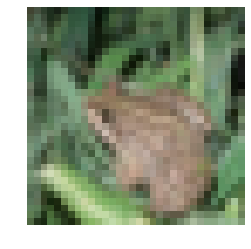

airplane 0.000000
automobile 0.000000
bird 0.000000
cat 0.000000
deer 0.000000
dog 0.000000
frog 1.000000
horse 0.000000
ship 0.000000
truck 0.000000


In [12]:
target_img_idx = 4
target_model.predict_and_show(X_test[target_img_idx])

avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	32    	7.66179e-08
-1 	2  	-0.999999	-1 	32    	1.42927e-07
-1 	3  	-0.999998	-1 	32    	5.024e-07  
-0.999999	4  	-0.999998	-1 	32    	4.43544e-07
-0.999999	5  	-0.999999	-1 	32    	2.8292e-07 
-0.999999	6  	-0.999999	-1 	32    	2.86605e-07
-0.999999	7  	-0.999994	-1 	32    	1.08617e-06
-0.999998	8  	-0.999993	-1 	32    	1.84591e-06
-0.999968	9  	-0.999697	-1 	32    	8.80162e-05
-0.999946	10 	-0.999533	-0.999999	32    	0.000124028
-0.99956 	11 	-0.997497	-0.999999	32    	0.000750451
-0.997571	12 	-0.969602	-1       	32    	0.00728108 
-0.983636	13 	-0.755052	-1       	32    	0.0504359  
-0.930637	14 	-0.551259	-0.999994	32    	0.144256   
-0.833195	15 	0.719575 	-0.999995	32    	0.313539   


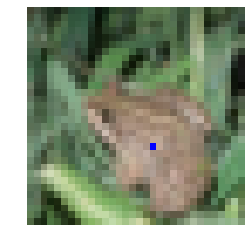

airplane 0.000000
automobile 0.000000
bird 0.000002
cat 0.000007
deer 0.859780
dog 0.000000
frog 0.140210
horse 0.000000
ship 0.000000
truck 0.000000


In [20]:
attacker = CIFAR10_attacker(resnet_model, X_test[target_img_idx], num_pixels=1)

'''choose one of following method to attack'''
#attacker.cma_es_attack(num_gen=300, sigma=0.2, verbose=True)
attacker.eaMuCommaLambda_attack(num_gen=300, verbose=True)    
#attacker.DE_attack(num_gen=300, verbose=True)

resnet_model.predict_and_show(attacker.add_adv(attacker.hof[0]))

avg      	gen	max      	min	nevals	std        
-0.999996	1  	-0.999906	-1 	64    	1.42545e-05
-0.999997	2  	-0.999938	-1 	64    	8.08106e-06
-0.999997	3  	-0.999942	-1 	64    	7.84997e-06
-0.999995	4  	-0.9999  	-1 	64    	1.46787e-05
-0.999997	5  	-0.99997 	-1 	64    	4.91158e-06
-0.999995	6  	-0.999933	-1 	64    	1.11661e-05
-0.999995	7  	-0.999953	-1 	64    	7.41251e-06
-0.999991	8  	-0.999921	-1 	64    	1.59031e-05
-0.999994	9  	-0.999959	-1 	64    	7.27274e-06
-0.999989	10 	-0.999926	-1 	64    	1.47349e-05
-0.999986	11 	-0.999878	-1 	64    	2.75336e-05
-0.999991	12 	-0.999906	-1 	64    	1.69827e-05
-0.999986	13 	-0.999903	-1 	64    	2.29635e-05
-0.999983	14 	-0.99989 	-0.999999	64    	2.65448e-05
-0.999982	15 	-0.999888	-1       	64    	2.93138e-05
-0.999974	16 	-0.999878	-1       	64    	3.38857e-05
-0.999968	17 	-0.999878	-1       	64    	3.64038e-05
-0.999967	18 	-0.999878	-0.999999	64    	3.80976e-05
-0.999952	19 	-0.999878	-0.999999	64    	3.803e-05  
-0.999937	20 	-0.999878	

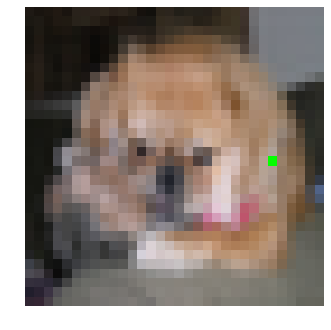

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000002')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.999938')
('frog', '0.000060')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999998	1  	-0.999982	-1 	64    	2.50701e-06
-0.999998	2  	-0.999952	-1 	64    	5.9272e-06 
-0.999998	3  	-0.999986	-1 	64    	2.66794e-06
-0.999998	4  	-0.999985	-1 	64    	2.31985e-06
-0.999993	5  	-0.999732	-1 	64    	3.30546e-05
-0.999992	6  	-0.99989 	-1 	64    	1.64197e-05
-0.999991	7  	-0.999701	-1 	64    	3.687e-05  
-0.999973	8  	-0.998645	-1 	64    	0.000167603
-0.999972	9  	-0.99917 	-1 	64    	0.000108966
-0.999986	10 	-0.999866	-1 	64    	2.21795e-05
-0.999973	11 	-0.999671	-1 	64    	6.07173e-05
-0.999904	12 	-0.99635 	-1 	64    	0.00047027 
-0.999924	13 	-0.99635 	-1 	64    	0.00045082 
-0.999912	14 	-0.99635 	-1 	64    	0.000452219
-0.999749	15 	-0.99635 	-0.999999	64    	0.000866437
-0.999759	16 	-0.99635

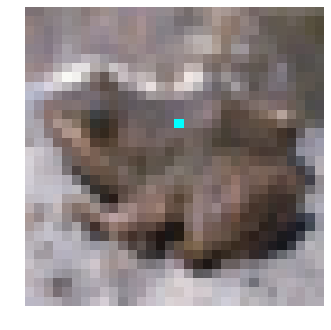

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.001823')
('cat', '0.000004')
('deer', '0.000001')
('dog', '0.000000')
('frog', '0.998172')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std        
-0.999982	1  	-0.999957	-0.999998	64    	8.34281e-06
-0.999983	2  	-0.999955	-0.999998	64    	8.17237e-06
-0.999978	3  	-0.999921	-0.999996	64    	1.35276e-05
-0.999977	4  	-0.999778	-0.999996	64    	2.66417e-05
-0.999977	5  	-0.999942	-0.999996	64    	1.20582e-05
-0.999975	6  	-0.999939	-0.999991	64    	1.2755e-05 
-0.999972	7  	-0.99988 	-0.999994	64    	2.17788e-05
-0.999969	8  	-0.999874	-0.999996	64    	2.26411e-05
-0.99997 	9  	-0.999909	-0.999997	64    	1.98136e-05
-0.999961	10 	-0.999656	-0.999994	64    	4.34584e-05
-0.999971	11 	-0.999877	-0.999995	64    	2.00356e-05
-0.999963	12 	-0.99988 	-0.999995	64    	2.57048e-05
-0.999965	13 	-0.999874	-0.999994	64    	2.35041e-05
-0.999953	14 	-0.999874	-0.999986	64  

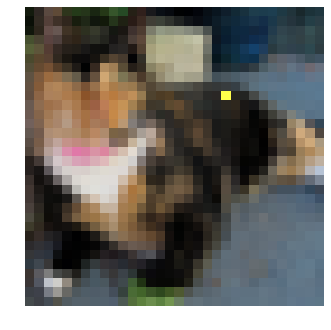

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.999828')
('deer', '0.000000')
('dog', '0.000172')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std       
-0.999396	1  	-0.991918	-0.999875	64    	0.00117248
-0.999481	2  	-0.995626	-0.999917	64    	0.000689343
-0.999441	3  	-0.992446	-0.999902	64    	0.00104999 
-0.99868 	4  	-0.987686	-0.999923	64    	0.0025651  
-0.99896 	5  	-0.98639 	-0.999941	64    	0.00221226 
-0.998478	6  	-0.988108	-0.999907	64    	0.00289089 
-0.998369	7  	-0.963188	-0.99989 	64    	0.00488927 
-0.996982	8  	-0.968563	-0.999906	64    	0.00638932 
-0.996845	9  	-0.971715	-0.999882	64    	0.00457918 
-0.994699	10 	-0.963212	-0.99985 	64    	0.0078807  
-0.992882	11 	-0.963563	-0.999773	64    	0.00962956 
-0.992326	12 	-0.962728	-0.999755	64    	0.00998556 
-0.989185	13 	-0.962789	-0.999372	64    	0.0109719  
-0.987759	14 	-0.962789	-0.999493	64    

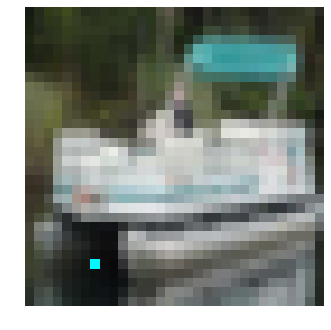

('airplane', '0.000000')
('automobile', '0.000014')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.981357')
('truck', '0.018629')
avg      	gen	max      	min	nevals	std        
-0.999994	1  	-0.999825	-1 	64    	2.87143e-05
-0.999998	2  	-0.999949	-1 	64    	6.4675e-06 
-0.999986	3  	-0.999271	-1 	64    	9.02147e-05
-0.985392	4  	-0.0653648	-1 	64    	0.115913   
-0.99997 	5  	-0.998661 	-1 	64    	0.000168825
-0.967169	6  	0.413682  	-1 	64    	0.193602   


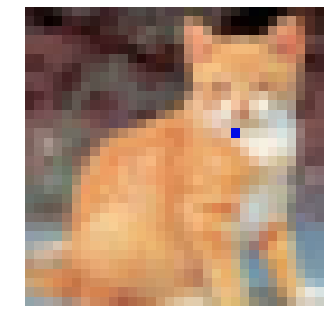

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.293155')
('deer', '0.000003')
('dog', '0.706837')
('frog', '0.000004')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std     
-0.995588	1  	-0.870105	-0.999923	64    	0.016038
-0.996787	2  	-0.978451	-0.999853	64    	0.00346936
-0.995543	3  	-0.951366	-0.999706	64    	0.00753224
-0.983279	4  	-0.275253	-0.999825	64    	0.0896471 
-0.991918	5  	-0.813563	-0.999839	64    	0.0234205 
-0.987504	6  	-0.69159 	-0.999884	64    	0.0420188 
-0.992328	7  	-0.916806	-0.999525	64    	0.0143418 
-0.969587	8  	0.07075  	-0.999823	64    	0.134765  


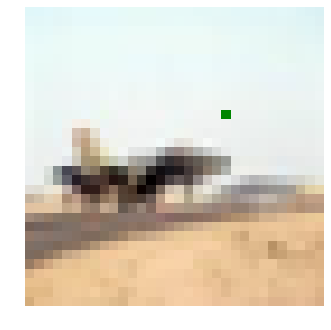

('airplane', '0.458168')
('automobile', '0.000104')
('bird', '0.011330')
('cat', '0.528918')
('deer', '0.000194')
('dog', '0.000001')
('frog', '0.000005')
('horse', '0.000012')
('ship', '0.000302')
('truck', '0.000965')
avg      	gen	max     	min      	nevals	std     
-0.158137	1  	0.733572	-0.959302	64    	0.433765


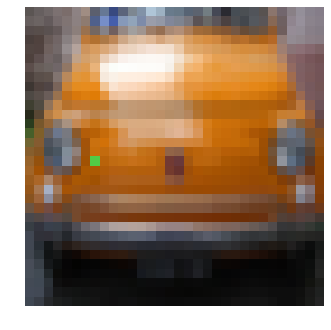

('airplane', '0.003405')
('automobile', '0.865081')
('bird', '0.000000')
('cat', '0.000005')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.131509')
avg      	gen	max      	min      	nevals	std       
-0.996984	1  	-0.986546	-0.999429	64    	0.00220101
-0.997294	2  	-0.989537	-0.999498	64    	0.00164567
-0.99652 	3  	-0.983918	-0.99974 	64    	0.00289277
-0.996551	4  	-0.986649	-0.999686	64    	0.00252895
-0.995363	5  	-0.98538 	-0.99923 	64    	0.0032695 
-0.993937	6  	-0.982023	-0.999186	64    	0.00457812
-0.995388	7  	-0.983776	-0.9994  	64    	0.00393087
-0.994827	8  	-0.983112	-0.999932	64    	0.00445669
-0.994456	9  	-0.983592	-0.999088	64    	0.00427772
-0.993538	10 	-0.982627	-0.999479	64    	0.00492331
-0.9921  	11 	-0.98196 	-0.998321	64    	0.00522956
-0.990873	12 	-0.982398	-0.998729	64    	0.00557798
-0.990399	13 	-0.98292 	-0.997993	64    	0.00550241
-0.986799	14 	-0.981801	-0.996383	64    	0.00414182


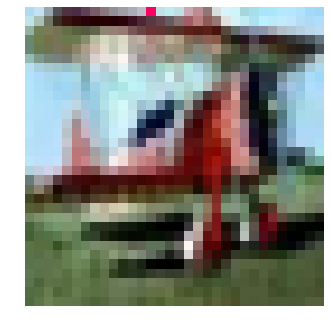

('airplane', '0.990261')
('automobile', '0.000004')
('bird', '0.000002')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000153')
('horse', '0.008463')
('ship', '0.000040')
('truck', '0.001078')
avg      	gen	max      	min	nevals	std        
-0.999984	1  	-0.999924	-1 	64    	1.33809e-05
-0.999979	2  	-0.999895	-1 	64    	2.11858e-05
-0.999975	3  	-0.999911	-1 	64    	2.22676e-05
-0.999974	4  	-0.999912	-1 	64    	1.95571e-05
-0.999968	5  	-0.999899	-1 	64    	2.37793e-05
-0.999973	6  	-0.999914	-0.999999	64    	2.10708e-05
-0.999964	7  	-0.9999  	-1       	64    	2.60925e-05
-0.99995 	8  	-0.999893	-1       	64    	2.94355e-05
-0.999957	9  	-0.999898	-1       	64    	2.86226e-05
-0.999958	10 	-0.999909	-0.999999	64    	2.70541e-05
-0.999938	11 	-0.999899	-0.999988	64    	2.48548e-05
-0.999926	12 	-0.999898	-0.999974	64    	1.79747e-05
-0.999925	13 	-0.999897	-0.999979	64    	2.31615e-05
-0.999919	14 	-0.999897	-0.999972	64    	1.83721e-05
-0.99991 	15 	-0.9998

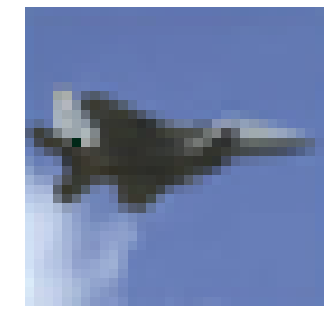

('airplane', '0.999947')
('automobile', '0.000000')
('bird', '0.000053')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max      	min	nevals	std        
-1 	1  	-0.999997	-1 	64    	4.65393e-07
-1 	2  	-0.999994	-1 	64    	7.30484e-07
-1 	3  	-0.999999	-1 	64    	2.58242e-07
-0.999999	4  	-0.999992	-1 	64    	1.22186e-06
-0.999999	5  	-0.999993	-1 	64    	1.34518e-06
-0.999999	6  	-0.999996	-1 	64    	8.86302e-07
-0.999999	7  	-0.999995	-1 	64    	1.15862e-06
-0.999999	8  	-0.999987	-1 	64    	2.38461e-06
-0.999998	9  	-0.999986	-1 	64    	2.6688e-06 
-0.999996	10 	-0.999965	-1 	64    	7.72821e-06
-0.999995	11 	-0.999958	-1 	64    	7.94189e-06
-0.999995	12 	-0.999951	-1 	64    	1.04667e-05
-0.99999 	13 	-0.999951	-1 	64    	1.24004e-05
-0.999982	14 	-0.999951	-0.999999	64    	1.74617e-05
-0.99998 	15 	-0.999951	-0.999999	64    	1.69064e-05
-0.99997 	16 	-0.999951	-0.999997	64    

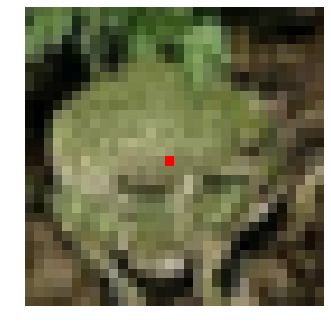

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000023')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.999974')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000003')
avg      	gen	max      	min      	nevals	std       
-0.999949	1  	-0.999825	-0.999972	64    	1.9503e-05
-0.999947	2  	-0.999843	-0.999995	64    	2.20492e-05
-0.999925	3  	-0.998796	-0.999986	64    	0.000145675
-0.99993 	4  	-0.999399	-0.999986	64    	7.96056e-05
-0.999935	5  	-0.999737	-0.999974	64    	4.16681e-05
-0.999931	6  	-0.999392	-0.999986	64    	7.76226e-05
-0.999912	7  	-0.999377	-0.999982	64    	0.000103621
-0.999876	8  	-0.99805 	-0.999983	64    	0.000260124
-0.9999  	9  	-0.998581	-0.999991	64    	0.000188606
-0.999851	10 	-0.998616	-0.999987	64    	0.000227439
-0.999795	11 	-0.998543	-0.999991	64    	0.000298395
-0.999808	12 	-0.998455	-0.999983	64    	0.000301576
-0.999678	13 	-0.99805 	-0.999981	64    	0.000437161
-0.999485	14 	-0.99805 	-0.99998 	64    

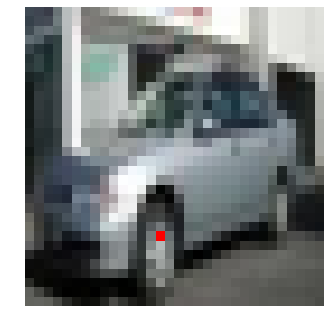

('airplane', '0.000000')
('automobile', '0.999013')
('bird', '0.000009')
('cat', '0.000011')
('deer', '0.000000')
('dog', '0.000001')
('frog', '0.000001')
('horse', '0.000000')
('ship', '0.000002')
('truck', '0.000962')
avg      	gen	max      	min	nevals	std        
-0.999986	1  	-0.999758	-1 	64    	3.95658e-05
-0.999985	2  	-0.999719	-1 	64    	4.12225e-05
-0.999985	3  	-0.999527	-1 	64    	5.89038e-05
-0.999983	4  	-0.999372	-1 	64    	7.79279e-05
-0.999984	5  	-0.999737	-0.999999	64    	3.89116e-05
-0.999988	6  	-0.999883	-0.999999	64    	2.003e-05  
-0.999987	7  	-0.99984 	-0.999999	64    	2.53881e-05
-0.999985	8  	-0.999826	-0.999999	64    	3.06473e-05
-0.999991	9  	-0.999928	-0.999999	64    	1.17246e-05
-0.999984	10 	-0.999839	-0.999999	64    	3.08338e-05
-0.999974	11 	-0.999437	-0.999999	64    	8.8869e-05 
-0.999977	12 	-0.999343	-1       	64    	8.24398e-05
-0.999986	13 	-0.999785	-0.999999	64    	3.12419e-05
-0.999986	14 	-0.99987 	-1       	64    	2.20509e-05
-0.99998 	15 	-

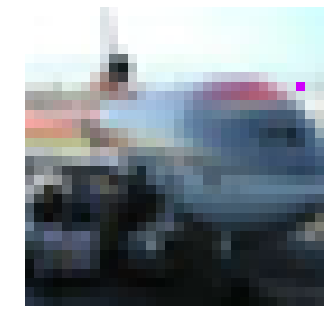

('airplane', '0.999669')
('automobile', '0.000001')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000003')
('truck', '0.000327')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999999	-1 	64    	2.09943e-07
-0.999999	2  	-0.999998	-1 	64    	2.97101e-07
-0.999999	3  	-0.999998	-1 	64    	2.96493e-07
-0.999999	4  	-0.999997	-1 	64    	4.10508e-07
-0.999999	5  	-0.999996	-1 	64    	7.06107e-07
-0.999999	6  	-0.999984	-1 	64    	1.92751e-06
-0.999999	7  	-0.999992	-1 	64    	1.17096e-06
-0.999998	8  	-0.999988	-1 	64    	2.51997e-06
-0.999998	9  	-0.99999 	-1 	64    	2.35133e-06
-0.999998	10 	-0.999967	-1 	64    	5.14969e-06
-0.999998	11 	-0.999988	-1 	64    	2.07188e-06
-0.999997	12 	-0.999969	-1 	64    	5.92476e-06
-0.999997	13 	-0.999983	-1 	64    	3.00034e-06
-0.999997	14 	-0.999981	-1 	64    	3.98739e-06
-0.999997	15 	-0.999965	-1 	64    	5.8463e-06 
-0.999996	16 	-0.999947	-1 	

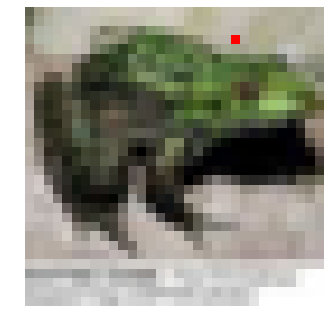

('airplane', '0.000000')
('automobile', '0.000001')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000036')
('frog', '0.999962')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000001')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	7.39214e-09
-1 	3  	-1 	-1 	64    	7.39214e-09
-1 	4  	-1 	-1 	64    	7.39214e-09
-1 	5  	-1 	-1 	64    	1.25987e-08
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	7.39214e-09
-1 	8  	-1 	-1 	64    	7.39214e-09
-1 	9  	-1 	-1 	64    	7.39214e-09
-1 	10 	-1 	-1 	64    	0          
-1 	11 	-1 	-1 	64    	0          
-1 	12 	-1 	-1 	64    	2.95686e-08
-1 	13 	-1 	-1 	64    	7.39214e-09
-1 	14 	-1 	-1 	64    	0          
-1 	15 	-1 	-1 	64    	2.42681e-08
-1 	16 	-1 	-1 	64    	1.5996e-08 
-1 	17 	-1 	-1 	64    	3.18153e-08
-1 	18 	-1 	-1 	64    	3.18153e-08
-1 	19 	-1 	-1 	64    	1.03708e-08
-1 	20 	-1 	-1 	64    	1.25987e-08
-1 	21 	-1 	-1 	64    	1.4428e-08 
-1 	22 	-1 	-1 	64    	1.5

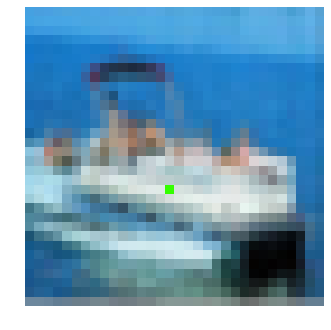

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '1.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

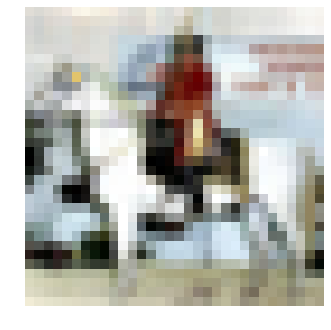

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '1.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std       
-0.999427	1  	-0.982526	-0.999974	64    	0.00223047
-0.998812	2  	-0.974541	-0.999975	64    	0.00407224
-0.999264	3  	-0.987376	-0.999996	64    	0.0019658 
-0.998747	4  	-0.984538	-0.999972	64    	0.0027395 
-0.997648	5  	-0.987315	-0.999978	64    	0.00336474
-0.993983	6  	-0.95741 	-0.999989	64    	0.00893991
-0.99484 	7  	-0.979012	-0.999989	64    	0.00538489
-0.994646	8  	-0.97304 	-0.999957	64    	0.00647106
-0.988247	9  	-0.938499	-0.999848	64    	0.0126914 
-0.99116 	10 	-0.942127	-0.999975	64    	0.0117571 
-0.989893	11 	-0.938499	-0.999963	64    	0.0118569 
-0.988012	12 	-0.943589	-0.999439	64    	0.0118247 
-0.985996	13 	-0.938499	-0.999637	64    	0.0132359 
-0.984322	14 	-0.947805	-0.998671	64    	0.0110989 


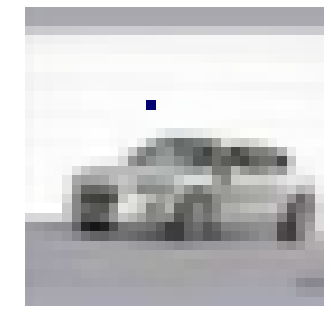

('airplane', '0.028823')
('automobile', '0.967181')
('bird', '0.000021')
('cat', '0.000191')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000006')
('horse', '0.000017')
('ship', '0.000029')
('truck', '0.003732')
avg      	gen	max      	min	nevals	std        
-0.999996	1  	-0.999937	-1 	64    	9.32953e-06
-0.999994	2  	-0.999869	-1 	64    	2.17622e-05
-0.99999 	3  	-0.999684	-1 	64    	4.00438e-05
-0.999989	4  	-0.999847	-1 	64    	2.83666e-05
-0.999973	5  	-0.999428	-1 	64    	8.15366e-05
-0.99989 	6  	-0.998559	-1 	64    	0.000296997
-0.999946	7  	-0.998996	-1 	64    	0.000148564
-0.999877	8  	-0.998661	-1 	64    	0.000239689
-0.99977 	9  	-0.998559	-0.999998	64    	0.000360856
-0.999629	10 	-0.992839	-0.999998	64    	0.000932647
-0.999619	11 	-0.997337	-0.999995	64    	0.000504926
-0.999458	12 	-0.989511	-0.999998	64    	0.00132578 
-0.999127	13 	-0.992517	-0.999997	64    	0.00128034 
-0.999281	14 	-0.99593 	-0.999998	64    	0.000900914
-0.998399	15 	-0.989459	-0.999996	64   

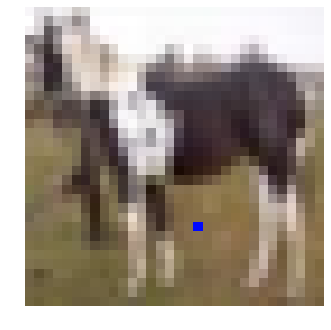

('airplane', '0.000000')
('automobile', '0.000004')
('bird', '0.000000')
('cat', '0.000003')
('deer', '0.000001')
('dog', '0.005293')
('frog', '0.000005')
('horse', '0.994690')
('ship', '0.000000')
('truck', '0.000002')
avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	64    	7.39214e-09
-1 	2  	-1 	-1 	64    	0          
-1 	3  	-1 	-1 	64    	7.39214e-09
-1 	4  	-1 	-1 	64    	1.03708e-08
-1 	5  	-1 	-1 	64    	0          
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	0          
-1 	8  	-1 	-1 	64    	7.39214e-09
-1 	9  	-1 	-1 	64    	1.25987e-08
-1 	10 	-1 	-1 	64    	1.03708e-08
-1 	11 	-0.999993	-1 	64    	9.1627e-07 
-1 	12 	-0.999999	-1 	64    	1.89823e-07
-1 	13 	-0.999991	-1 	64    	1.19088e-06
-1 	14 	-0.999997	-1 	64    	3.65818e-07
-1 	15 	-0.999994	-1 	64    	8.16389e-07
-1 	16 	-0.999984	-1 	64    	2.15199e-06
-1 	17 	-0.999989	-1 	64    	1.76815e-06
-0.999999	18 	-0.999993	-1 	64    	1.46215e-06
-0.999999	19 	-0.999987	-1 	64    	2.68989e-06
-0.999997	20 	

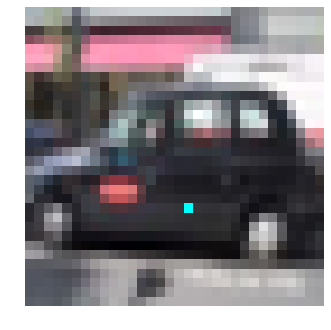

('airplane', '0.000000')
('automobile', '0.999969')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000031')
avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	64    	7.39214e-09
-1 	2  	-1 	-1 	64    	0          
-1 	3  	-1 	-1 	64    	2.32644e-08
-1 	4  	-1 	-1 	64    	2.95686e-08
-1 	5  	-1 	-1 	64    	0          
-0.999998	6  	-0.999866	-1 	64    	1.66011e-05
-0.99736 	7  	-0.831122	-1 	64    	0.020944   
-0.978316	8  	0.387786 	-1 	64    	0.172113   


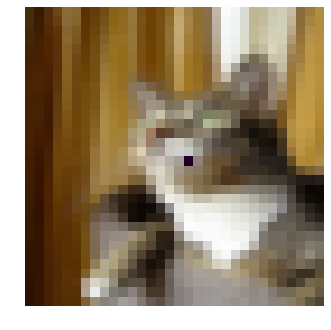

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.306105')
('deer', '0.000005')
('dog', '0.693890')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	64    	7.39214e-09
-1 	2  	-1 	-1 	64    	0          
-1 	3  	-1 	-1 	64    	0          
-1 	4  	-1 	-1 	64    	0          
-1 	5  	-1 	-1 	64    	0          
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	2.21764e-08
-1 	8  	-1 	-1 	64    	7.39214e-09
-1 	9  	-1 	-1 	64    	2.21764e-08
-1 	10 	-1 	-1 	64    	0          
-1 	11 	-1 	-1 	64    	4.32739e-08
-1 	12 	-1 	-1 	64    	1.03708e-08
-1 	13 	-0.999991	-1 	64    	1.07947e-06
-1 	14 	-1       	-1 	64    	7.39214e-08
-1 	15 	-0.999999	-1 	64    	1.94635e-07
-1 	16 	-0.999998	-1 	64    	2.85208e-07
-1 	17 	-0.999999	-1 	64    	1.88155e-07
-1 	18 	-0.999992	-1 	64    	1.1735e-06 
-1 	19 	-0.999997	-1 	64    	5.87386e-07
-0.999999	20 	-0.999991	-1 	64    	1.5

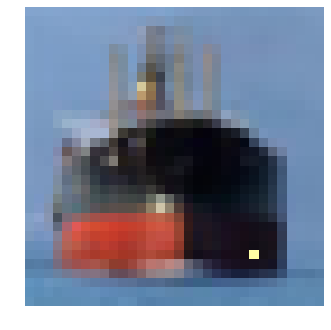

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.999996')
('truck', '0.000004')
avg      	gen	max      	min      	nevals	std        
-0.999969	1  	-0.999943	-0.999984	64    	7.10416e-06
-0.999964	2  	-0.999871	-0.999996	64    	1.99013e-05
-0.999955	3  	-0.999682	-0.999987	64    	4.09346e-05
-0.999943	4  	-0.999137	-0.999993	64    	0.000118922
-0.99993 	5  	-0.999578	-0.99999 	64    	8.50837e-05
-0.999944	6  	-0.999806	-0.999996	64    	4.16117e-05
-0.999915	7  	-0.998884	-0.999992	64    	0.000166897
-0.999879	8  	-0.998906	-0.999995	64    	0.000212351
-0.999888	9  	-0.999027	-0.999991	64    	0.000181715
-0.999884	10 	-0.999316	-0.999992	64    	0.000161434
-0.999792	11 	-0.998121	-0.999992	64    	0.000331445
-0.999654	12 	-0.998126	-0.999993	64    	0.000406468
-0.999642	13 	-0.997947	-0.999988	64    	0.000366614
-0.999563	14 	-0.997592	-0.999979	64  

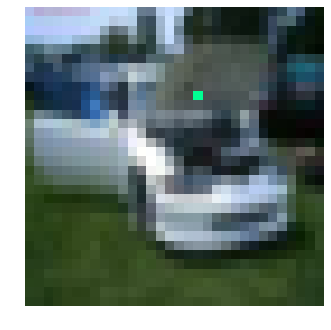

('airplane', '0.000073')
('automobile', '0.998612')
('bird', '0.000001')
('cat', '0.000003')
('deer', '0.000002')
('dog', '0.000052')
('frog', '0.000020')
('horse', '0.000000')
('ship', '0.001101')
('truck', '0.000135')
avg      	gen	max     	min      	nevals	std     
-0.945637	1  	-0.76496	-0.992375	64    	0.042153
-0.92961 	2  	-0.444627	-0.991551	64    	0.0852155
-0.913259	3  	-0.120273	-0.998594	64    	0.135694 
-0.821059	4  	0.481025 	-0.993541	64    	0.264067 


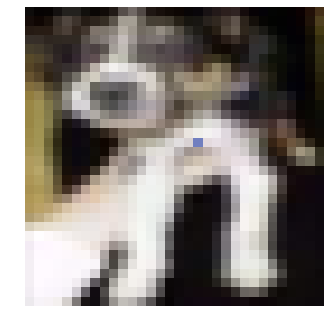

('airplane', '0.000106')
('automobile', '0.000085')
('bird', '0.000019')
('cat', '0.000018')
('deer', '0.002643')
('dog', '0.257981')
('frog', '0.000002')
('horse', '0.739006')
('ship', '0.000000')
('truck', '0.000138')
avg      	gen	max      	min      	nevals	std       
-0.998696	1  	-0.956093	-0.999985	64    	0.00563791
-0.995376	2  	-0.878576	-0.999999	64    	0.0181874 
-0.996102	3  	-0.922769	-1       	64    	0.012119  
-0.991932	4  	-0.837497	-0.999993	64    	0.0277363 
-0.971696	5  	-0.45649 	-0.999996	64    	0.0983914 
-0.986191	6  	-0.859133	-0.999992	64    	0.0337218 
-0.963699	7  	-0.474114	-0.999996	64    	0.111345  
-0.959877	8  	-0.490764	-0.999997	64    	0.105991  
-0.955716	9  	-0.407402	-0.999973	64    	0.101509  
-0.896387	10 	-0.451884	-0.999962	64    	0.15424   
-0.860859	11 	-0.374917	-0.999951	64    	0.178668  
-0.780206	12 	-0.385477	-0.9968  	64    	0.215742  
-0.752658	13 	-0.390215	-0.998482	64    	0.232085  
-0.775025	14 	-0.375822	-0.998475	64    	0.224439  


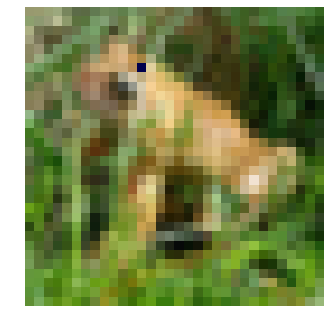

('airplane', '0.000000')
('automobile', '0.000005')
('bird', '0.000007')
('cat', '0.000043')
('deer', '0.035956')
('dog', '0.297543')
('frog', '0.666413')
('horse', '0.000005')
('ship', '0.000008')
('truck', '0.000021')
avg	gen	max      	min	nevals	std       
-1 	1  	-0.999999	-1 	64    	1.3473e-07
-1 	2  	-0.999999	-1 	64    	1.05367e-07
-0.999998	3  	-0.999896	-1 	64    	1.27973e-05
-0.999993	4  	-0.999819	-1 	64    	3.01249e-05
-0.999993	5  	-0.999611	-1 	64    	4.82408e-05
-0.999989	6  	-0.999596	-1 	64    	5.19501e-05
-0.99995 	7  	-0.999237	-1 	64    	0.000167468
-0.999973	8  	-0.998863	-1 	64    	0.000142235
-0.999895	9  	-0.998106	-1 	64    	0.000307708
-0.989685	10 	-0.455121	-1 	64    	0.0677816  
-0.992309	11 	-0.844476	-1 	64    	0.0249613  
-0.948111	12 	-0.0131752	-1 	64    	0.177791   
-0.919597	13 	0.357527  	-1 	64    	0.264506   


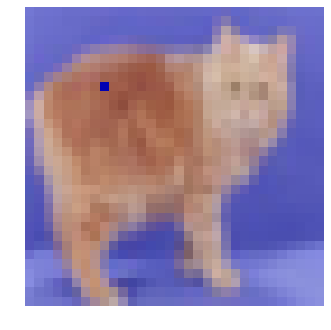

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.321237')
('deer', '0.000000')
('dog', '0.678763')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg     	gen	max      	min      	nevals	std       
-0.99996	1  	-0.999775	-0.999991	64    	3.8226e-05
-0.999959	2  	-0.999729	-0.999991	64    	4.13911e-05
-0.99987 	3  	-0.994339	-0.999994	64    	0.000698198
-0.999916	4  	-0.999353	-0.999988	64    	0.000117327
-0.999953	5  	-0.999723	-0.999995	64    	4.9436e-05 
-0.999812	6  	-0.993927	-0.999994	64    	0.000770451
-0.999842	7  	-0.996786	-0.999994	64    	0.000459301
-0.999853	8  	-0.998149	-0.999994	64    	0.000316195
-0.999702	9  	-0.993274	-0.999997	64    	0.000873601
-0.999454	10 	-0.992515	-0.999994	64    	0.00121621 
-0.998674	11 	-0.985789	-0.999992	64    	0.00241571 
-0.998562	12 	-0.98538 	-0.999992	64    	0.00227982 
-0.999186	13 	-0.991399	-0.999996	64    	0.00167299 
-0.998277	14 	-0.985245	-0.999999	64    	0

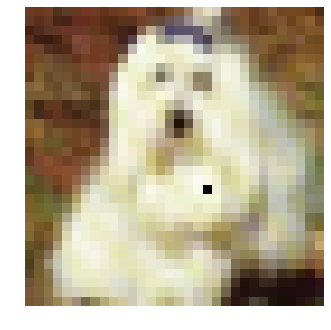

('airplane', '0.000000')
('automobile', '0.000001')
('bird', '0.000011')
('cat', '0.010434')
('deer', '0.000588')
('dog', '0.988886')
('frog', '0.000008')
('horse', '0.000071')
('ship', '0.000001')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.997065	1  	-0.950673	-0.999976	64    	0.0079051
-0.995613	2  	-0.942394	-0.999996	64    	0.0103519
-0.996546	3  	-0.927704	-0.999982	64    	0.0117189
-0.989417	4  	-0.635411	-0.999986	64    	0.0456713
-0.994387	5  	-0.931323	-0.999957	64    	0.0131315
-0.988139	6  	-0.752435	-0.999987	64    	0.0380387
-0.995999	7  	-0.939588	-0.99998 	64    	0.00817953
-0.991485	8  	-0.755594	-0.999996	64    	0.0348786 
-0.989012	9  	-0.881633	-0.999997	64    	0.024317  
-0.963782	10 	0.844824 	-0.999997	64    	0.22862   


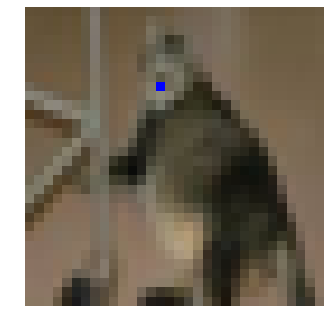

('airplane', '0.000007')
('automobile', '0.000000')
('bird', '0.922405')
('cat', '0.077581')
('deer', '0.000000')
('dog', '0.000002')
('frog', '0.000000')
('horse', '0.000003')
('ship', '0.000000')
('truck', '0.000002')
avg      	gen	max     	min      	nevals	std     
-0.660798	1  	0.243533	-0.981131	64    	0.278748


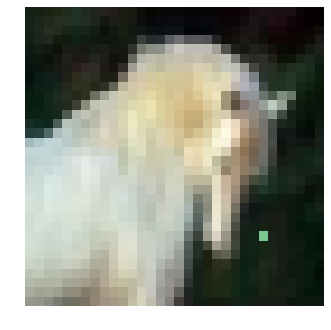

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000157')
('cat', '0.014630')
('deer', '0.000000')
('dog', '0.370839')
('frog', '0.000000')
('horse', '0.614372')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std        
-0.999977	1  	-0.999271	-0.999999	64    	9.14351e-05
-0.999795	2  	-0.990479	-0.999998	64    	0.00119156 
-0.997468	3  	-0.864308	-0.999999	64    	0.0169139  
-0.99882 	4  	-0.932374	-0.999999	64    	0.00840206 
-0.99877 	5  	-0.928497	-0.999999	64    	0.00886382 
-0.999507	6  	-0.975779	-0.999999	64    	0.00300928 
-0.987575	7  	-0.491518	-0.999999	64    	0.0640759  
-0.998393	8  	-0.929959	-0.999999	64    	0.00891001 
-0.989362	9  	-0.672099	-0.999999	64    	0.046784   
-0.987167	10 	-0.304775	-0.999999	64    	0.0862039  
-0.995613	11 	-0.925144	-0.999998	64    	0.015127   
-0.980888	12 	-0.638503	-0.999997	64    	0.0672939  
-0.984193	13 	-0.672099	-0.999997	64    	0.0540275  
-0.960351	14 	-0.672099	-0.999997	64  

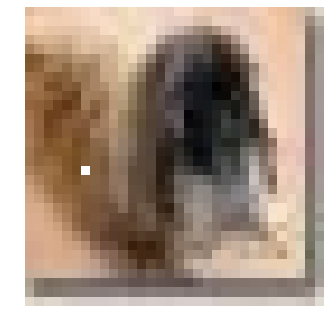

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000033')
('cat', '0.347596')
('deer', '0.000000')
('dog', '0.652371')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999991	1  	-0.999945	-1 	64    	1.17441e-05
-0.999986	2  	-0.999704	-1 	64    	3.94609e-05
-0.999974	3  	-0.999443	-1 	64    	7.64471e-05
-0.999959	4  	-0.998393	-1 	64    	0.000199393
-0.999974	5  	-0.999756	-1 	64    	4.60372e-05
-0.999922	6  	-0.998393	-1 	64    	0.000221549
-0.999935	7  	-0.999114	-1 	64    	0.000159427
-0.999894	8  	-0.998796	-1 	64    	0.00021348 
-0.999842	9  	-0.99863 	-1 	64    	0.000279904
-0.999662	10 	-0.995681	-1 	64    	0.000725724
-0.999344	11 	-0.993385	-0.999998	64    	0.00120759 
-0.999297	12 	-0.99644 	-0.999994	64    	0.000831049
-0.999005	13 	-0.994866	-0.99999 	64    	0.00117685 
-0.999158	14 	-0.993385	-0.999998	64    	0.00130785 
-0.998862	15 	-0.994866	-0.999984	64    	0.00121371

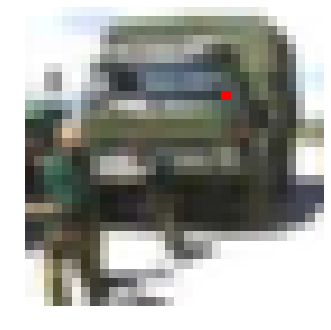

('airplane', '0.000110')
('automobile', '0.003252')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000001')
('ship', '0.000000')
('truck', '0.996637')
avg      	gen	max      	min      	nevals	std        
-0.999984	1  	-0.999938	-0.999997	64    	1.16209e-05
-0.999973	2  	-0.999881	-0.999994	64    	2.25686e-05
-0.999975	3  	-0.999878	-0.999997	64    	1.90798e-05
-0.999969	4  	-0.999801	-0.999995	64    	3.06535e-05
-0.999968	5  	-0.999879	-0.999998	64    	2.61225e-05
-0.999953	6  	-0.999844	-0.999999	64    	3.62831e-05
-0.999954	7  	-0.999856	-0.999998	64    	4.12095e-05
-0.999952	8  	-0.999811	-0.999997	64    	4.2576e-05 
-0.999949	9  	-0.999806	-0.999995	64    	4.38321e-05
-0.999937	10 	-0.999835	-1       	64    	4.40929e-05
-0.999946	11 	-0.999671	-0.999989	64    	5.10937e-05
-0.999921	12 	-0.99977 	-0.999999	64    	5.30318e-05
-0.999932	13 	-0.999764	-0.999992	64    	5.60743e-05
-0.999925	14 	-0.999622	-0.999998	64  

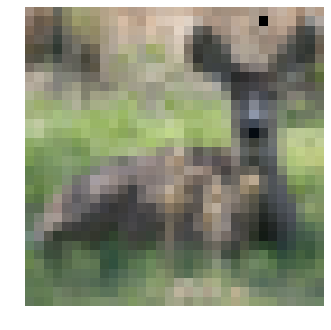

('airplane', '0.000029')
('automobile', '0.000113')
('bird', '0.038987')
('cat', '0.003496')
('deer', '0.825146')
('dog', '0.000078')
('frog', '0.131934')
('horse', '0.000044')
('ship', '0.000002')
('truck', '0.000171')
avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	64    	1.38911e-07
-1 	2  	-0.999996	-1 	64    	6.13418e-07
-1 	3  	-0.999998	-1 	64    	3.6485e-07 
-1 	4  	-0.999993	-1 	64    	9.59477e-07
-1 	5  	-0.999998	-1 	64    	4.04258e-07
-0.999999	6  	-0.999993	-1 	64    	1.03258e-06
-0.999999	7  	-0.999997	-1 	64    	7.38602e-07
-0.999999	8  	-0.999989	-1 	64    	1.53094e-06
-0.999999	9  	-0.999985	-1 	64    	2.61326e-06
-0.999998	10 	-0.999953	-1 	64    	6.5862e-06 
-0.999999	11 	-0.999982	-1 	64    	2.83884e-06
-0.999998	12 	-0.999961	-1 	64    	5.65156e-06
-0.999999	13 	-0.999989	-1 	64    	1.6767e-06 
-0.999998	14 	-0.999982	-1 	64    	3.25162e-06
-0.999998	15 	-0.999961	-1 	64    	5.51344e-06
-0.999998	16 	-0.99999 	-1 	64    	2.45195e-06
-0.999996	17 	-0.999956	-1 	6

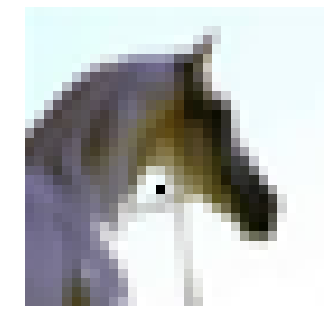

('airplane', '0.000012')
('automobile', '0.000000')
('bird', '0.000003')
('cat', '0.000015')
('deer', '0.000001')
('dog', '0.000002')
('frog', '0.000000')
('horse', '0.999967')
('ship', '0.000000')
('truck', '0.000000')
avg       	gen	max     	min      	nevals	std     
0.00912836	1  	0.793443	-0.970278	64    	0.430485


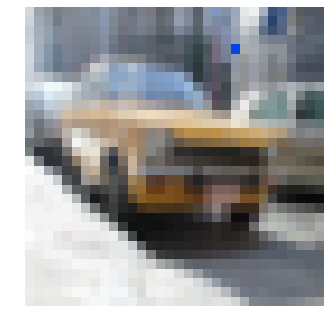

('airplane', '0.001511')
('automobile', '0.102464')
('bird', '0.000001')
('cat', '0.000001')
('deer', '0.000000')
('dog', '0.000001')
('frog', '0.000005')
('horse', '0.000000')
('ship', '0.000111')
('truck', '0.895907')
avg      	gen	max      	min      	nevals	std      
-0.779489	1  	-0.602237	-0.945533	64    	0.0836987
-0.779211	2  	-0.584238	-0.946758	64    	0.0854868
-0.763603	3  	-0.1882  	-0.942451	64    	0.113843 
-0.776274	4  	-0.498219	-0.960005	64    	0.0955567
-0.790736	5  	-0.376011	-0.945834	64    	0.0925284
-0.718345	6  	-0.341664	-0.937737	64    	0.118204 
-0.737494	7  	-0.35667 	-0.950546	64    	0.141672 
-0.705801	8  	-0.0818184	-0.941439	64    	0.159112 
-0.72834 	9  	-0.27678  	-0.93913 	64    	0.140412 
-0.713438	10 	-0.0754765	-0.96311 	64    	0.206419 
-0.687863	11 	-0.225441 	-0.966045	64    	0.185227 
-0.703579	12 	0.0657387 	-0.949987	64    	0.213119 


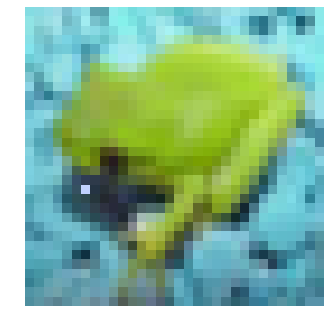

('airplane', '0.527809')
('automobile', '0.000158')
('bird', '0.009939')
('cat', '0.000003')
('deer', '0.000001')
('dog', '0.000003')
('frog', '0.462070')
('horse', '0.000003')
('ship', '0.000009')
('truck', '0.000006')
avg      	gen	max     	min      	nevals	std     
-0.670256	1  	0.379213	-0.940458	64    	0.189934


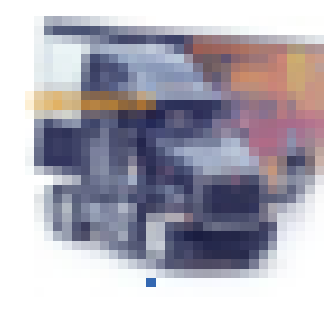

('airplane', '0.000000')
('automobile', '0.689605')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.310395')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

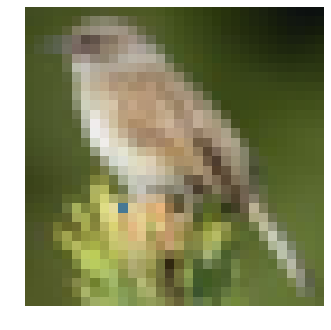

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '1.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	7.39214e-09
-1 	3  	-1 	-1 	64    	0          
-1 	4  	-1 	-1 	64    	7.39214e-09
-1 	5  	-1 	-1 	64    	0          
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	0          
-1 	8  	-1 	-1 	64    	3.11123e-08
-1 	9  	-1 	-1 	64    	0          
-1 	10 	-0.999999	-1 	64    	7.39214e-08
-1 	11 	-1       	-1 	64    	6.27521e-08
-1 	12 	-1       	-1 	64    	0          
-1 	13 	-1       	-1 	64    	4.43529e-08
-1 	14 	-1       	-1 	64    	7.39214e-09
-1 	15 	-1       	-1 	64    	3.6678e-08 
-1 	16 	-1       	-1 	64    	7.39214e-09
-1 	17 	-1       	-1 	64    	2.21764e-08
-1 	18 	-0.999999	-1 	64    	7.70469e-08
-1 	19 	-1       	-1 	64    	2.51974e-08
-1 	20 	-1       	-1 	64    	3.36825

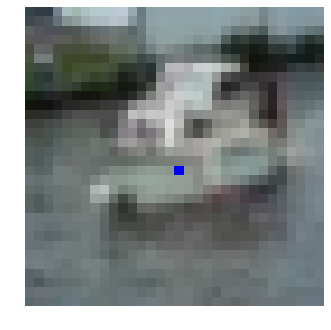

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000009')
('dog', '0.000073')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.999918')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std        
-0.999703	1  	-0.996253	-0.999976	64    	0.000510589
-0.999539	2  	-0.994204	-0.999973	64    	0.000847177
-0.999411	3  	-0.996393	-0.999986	64    	0.000805164
-0.999281	4  	-0.988184	-0.999983	64    	0.00178515 
-0.998761	5  	-0.952809	-0.999972	64    	0.00583889 
-0.997542	6  	-0.897819	-0.999993	64    	0.0126809  
-0.997561	7  	-0.908593	-0.99998 	64    	0.0113053  
-0.998909	8  	-0.983907	-0.999992	64    	0.00254982 
-0.985053	9  	-0.471252	-0.999982	64    	0.0716188  
-0.982898	10 	-0.116177	-0.999998	64    	0.109612   
-0.99712 	11 	-0.92534 	-0.999994	64    	0.0107314  
-0.991782	12 	-0.84461 	-0.99999 	64    	0.0258576  
-0.945942	13 	0.707541 	-0.999993	64    	0.238111   


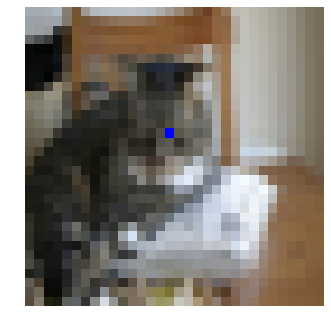

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000001')
('cat', '0.146226')
('deer', '0.000000')
('dog', '0.000001')
('frog', '0.000000')
('horse', '0.853767')
('ship', '0.000000')
('truck', '0.000005')
avg      	gen	max      	min      	nevals	std        
-0.999965	1  	-0.999757	-0.999994	64    	4.27013e-05
-0.999956	2  	-0.999752	-0.999998	64    	5.00824e-05
-0.999939	3  	-0.999574	-0.999998	64    	7.52941e-05
-0.999946	4  	-0.999712	-0.999998	64    	6.83696e-05
-0.999939	5  	-0.999648	-0.999998	64    	6.94729e-05
-0.999915	6  	-0.999541	-0.999998	64    	9.43806e-05
-0.999852	7  	-0.9988  	-0.999985	64    	0.000179625
-0.999867	8  	-0.998757	-0.999996	64    	0.000205418
-0.999834	9  	-0.996739	-0.999994	64    	0.000411369
-0.999704	10 	-0.995209	-0.999999	64    	0.00075311 
-0.999801	11 	-0.998634	-0.999991	64    	0.000254737
-0.999676	12 	-0.993885	-0.999998	64    	0.000807593
-0.999623	13 	-0.994051	-0.999997	64    	0.000962772
-0.999627	14 	-0.995127	-0.999996	64  

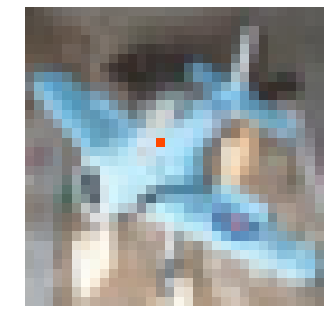

('airplane', '0.946955')
('automobile', '0.000001')
('bird', '0.000000')
('cat', '0.053024')
('deer', '0.000014')
('dog', '0.000005')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std     
-0.892164	1  	-0.381508	-0.999388	64    	0.119724
-0.84521 	2  	0.731122 	-0.997047	64    	0.23529 


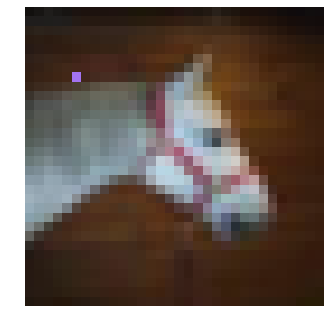

('airplane', '0.865393')
('automobile', '0.000005')
('bird', '0.000005')
('cat', '0.000025')
('deer', '0.000001')
('dog', '0.000051')
('frog', '0.000243')
('horse', '0.134270')
('ship', '0.000003')
('truck', '0.000004')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	7.39214e-09
-1 	11 	-1 	-1 	64    	7.39214e-09
-1 	12 	-1 	-1 	64    	7.39214e-09
-1 	13 	-1 	-1 	64    	7.39214e-09
-1 	14 	-0.999999	-1 	64    	1.18388e-07
-1 	15 	-1       	-1 	64    	6.64249e-08
-1 	16 	-1       	-1 	64    	5.29135e-08
-1 	17 	-1       	-1 	64    	7.39214e-09
-1 	18 	-0.999999	-1 	64    	2.24553e-07
-1 	19 	-1       	-1 	64    	2.68635e-08
-1 	20 	-0.999999	-1 	64    	9.47892e-08
-1 	21 	-1       	-1 	64    	3.18153e-08
-1 	22 	-0.999993	-1 	64    	9.26445e-07
-

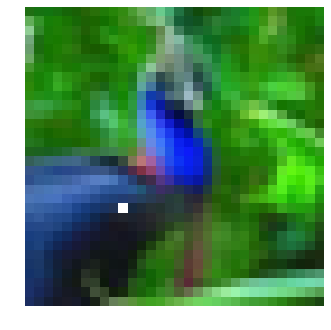

('airplane', '0.000007')
('automobile', '0.000000')
('bird', '0.999993')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.956209	1  	-0.451713	-0.999709	64    	0.0765987
-0.958188	2  	-0.637401	-0.998226	64    	0.0646941
-0.942519	3  	-0.0483249	-0.99967 	64    	0.129356 
-0.922955	4  	-0.0364313	-0.999439	64    	0.14566  
-0.922506	5  	-0.293171 	-0.998496	64    	0.127969 
-0.869325	6  	0.0759323 	-0.9987  	64    	0.201766 


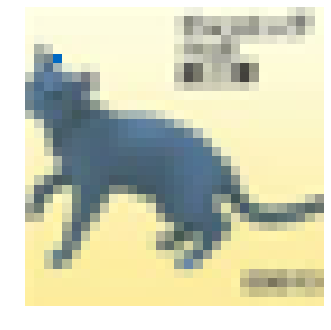

('airplane', '0.000177')
('automobile', '0.000018')
('bird', '0.000000')
('cat', '0.461438')
('deer', '0.000000')
('dog', '0.537370')
('frog', '0.000001')
('horse', '0.000995')
('ship', '0.000000')
('truck', '0.000002')
avg      	gen	max     	min      	nevals	std     
-0.606731	1  	0.601196	-0.880934	64    	0.264637


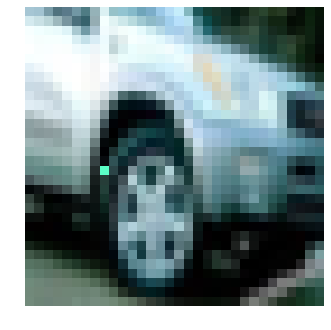

('airplane', '0.000000')
('automobile', '0.199402')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.800598')
avg      	gen	max      	min      	nevals	std       
-0.983996	1  	-0.963633	-0.999107	64    	0.00822931
-0.981133	2  	-0.971845	-0.999064	64    	0.00631688
-0.978643	3  	-0.972541	-0.99361 	64    	0.00401855
-0.978449	4  	-0.975178	-0.998009	64    	0.00434671
-0.977732	5  	-0.973396	-0.997262	64    	0.003515  
-0.97716 	6  	-0.972673	-0.992618	64    	0.00270764
-0.976389	7  	-0.970733	-0.986775	64    	0.0016641 
-0.976527	8  	-0.974775	-0.981852	64    	0.0011665 
-0.976229	9  	-0.97528 	-0.977596	64    	0.000564345
-0.976276	10 	-0.975117	-0.977833	64    	0.000617783
-0.976273	11 	-0.974802	-0.98341 	64    	0.00113835 
-0.97625 	12 	-0.974407	-0.979362	64    	0.000853677
-0.976326	13 	-0.973155	-0.987154	64    	0.00195411 
-0.97704 	14 	-0.972304	-0.996898	64    	0.0039

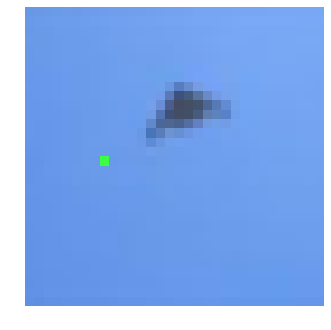

('airplane', '0.981817')
('automobile', '0.000000')
('bird', '0.018183')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg     	gen	max     	min      	nevals	std     
-0.66605	1  	0.741171	-0.997744	64    	0.434164


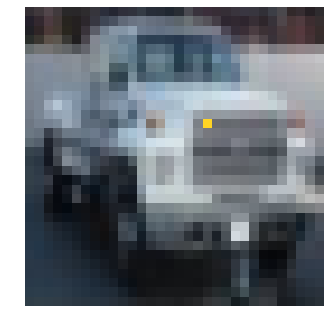

('airplane', '0.000000')
('automobile', '0.870585')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.129415')
avg      	gen	max      	min      	nevals	std        
-0.999975	1  	-0.999145	-0.999998	64    	0.000104893
-0.999986	2  	-0.999838	-0.999999	64    	2.03782e-05
-0.999979	3  	-0.99983 	-0.999999	64    	3.0085e-05 
-0.999986	4  	-0.999944	-0.999999	64    	9.8927e-06 
-0.999984	5  	-0.99982 	-0.999999	64    	2.20648e-05
-0.999986	6  	-0.999912	-0.999999	64    	1.44449e-05
-0.999986	7  	-0.999937	-0.999997	64    	1.07278e-05
-0.999984	8  	-0.999889	-0.999998	64    	1.75584e-05
-0.99996 	9  	-0.998817	-0.999999	64    	0.000152125
-0.999977	10 	-0.99948 	-0.999998	64    	6.40539e-05
-0.999976	11 	-0.999865	-0.999998	64    	2.9281e-05 
-0.999972	12 	-0.999725	-0.999999	64    	5.03607e-05
-0.99997 	13 	-0.99941 	-0.999999	64    	7.69799e-05
-0.999951	14 	-0.999301	-0.999999	64  

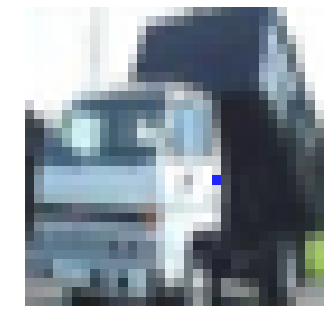

('airplane', '0.000001')
('automobile', '0.000468')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000002')
('ship', '0.000244')
('truck', '0.999285')
avg      	gen	max      	min	nevals	std        
-0.999987	1  	-0.999443	-1 	64    	6.98844e-05
-0.999994	2  	-0.999912	-1 	64    	1.35623e-05
-0.999988	3  	-0.999729	-1 	64    	3.48744e-05
-0.999991	4  	-0.999877	-1 	64    	1.86083e-05
-0.999967	5  	-0.998731	-1 	64    	0.000162178
-0.999987	6  	-0.999756	-1 	64    	3.23961e-05
-0.999975	7  	-0.9995  	-1 	64    	7.97543e-05
-0.99996 	8  	-0.999639	-1 	64    	7.67e-05   
-0.99998 	9  	-0.99983 	-1 	64    	3.61573e-05
-0.99994 	10 	-0.999407	-1 	64    	0.0001065  
-0.999903	11 	-0.999134	-0.999999	64    	0.00015532 
-0.999829	12 	-0.997903	-0.999999	64    	0.000320065
-0.999803	13 	-0.997254	-0.999999	64    	0.000423082
-0.999765	14 	-0.995842	-0.999999	64    	0.000618332
-0.999721	15 	-0.994738	-0.999999	64    	0.00072063

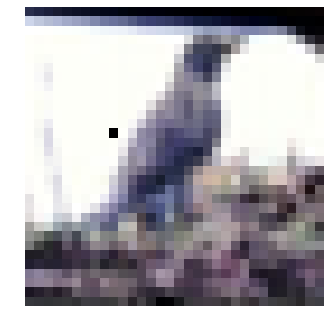

('airplane', '0.004444')
('automobile', '0.000000')
('bird', '0.995556')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std       
-0.999945	1  	-0.998978	-1 	64    	0.00016214
-0.999321	2  	-0.969563	-1 	64    	0.00383767
-0.997825	3  	-0.87605 	-1 	64    	0.0153596 
-0.998677	4  	-0.950982	-1 	64    	0.00620458
-0.992284	5  	-0.529059	-0.999999	64    	0.058366  
-0.999227	6  	-0.98326 	-0.999998	64    	0.00254762
-0.98452 	7  	-0.344559	-0.999999	64    	0.0850661 
-0.998695	8  	-0.986787	-1       	64    	0.00299188
-0.986015	9  	-0.691703	-1       	64    	0.0535391 
-0.964633	10 	0.488634 	-0.999999	64    	0.187483  


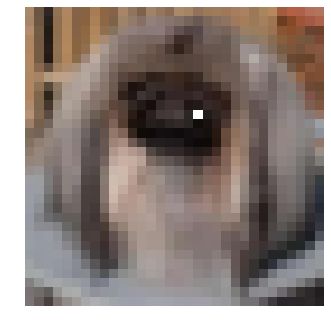

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000023')
('cat', '0.744292')
('deer', '0.000001')
('dog', '0.255658')
('frog', '0.000019')
('horse', '0.000006')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

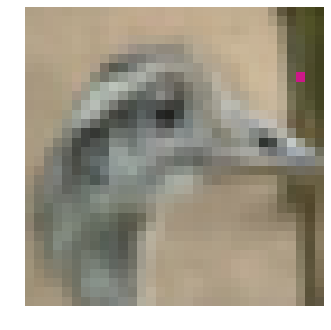

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '1.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999998	-1 	64    	3.86673e-07
-0.999999	2  	-0.999998	-1 	64    	4.40778e-07
-0.999999	3  	-0.999994	-1 	64    	8.7275e-07 
-0.999999	4  	-0.999997	-1 	64    	5.78644e-07
-0.999999	5  	-0.999978	-1 	64    	2.65659e-06
-0.999999	6  	-0.999995	-1 	64    	8.09027e-07
-0.999999	7  	-0.999995	-1 	64    	8.8535e-07 
-0.999999	8  	-0.999994	-1 	64    	1.14258e-06
-0.999999	9  	-0.999997	-1 	64    	7.726e-07  
-0.999998	10 	-0.999993	-1 	64    	1.27562e-06
-0.999998	11 	-0.999994	-1 	64    	9.62683e-07
-0.999998	12 	-0.999993	-1 	64    	1.51148e-06
-0.999997	13 	-0.999993	-1 	64    	1.7459e-06 
-0.999997	14 	-0.999993	-1 	64    	1.9071e-06 
-0.999997	15 	-0.999993	-1 	64    	2.01477e-06
-0.999996	16 	-0.999993	-0.9

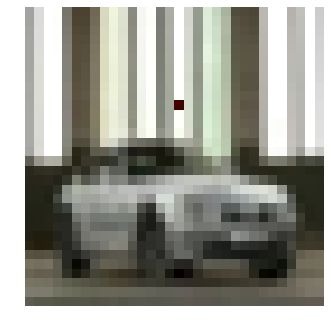

('airplane', '0.000000')
('automobile', '0.999989')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000011')
avg      	gen	max      	min      	nevals	std        
-0.999956	1  	-0.999897	-0.999979	64    	1.44145e-05
-0.999938	2  	-0.999702	-0.999976	64    	5.33703e-05
-0.999897	3  	-0.998128	-0.999994	64    	0.000252201
-0.999902	4  	-0.998807	-0.999976	64    	0.000196897
-0.999828	5  	-0.99845 	-0.999989	64    	0.000330884
-0.999582	6  	-0.989288	-0.999987	64    	0.00162257 
-0.991227	7  	-0.682057	-0.99999 	64    	0.0446254  
-0.990631	8  	-0.495505	-0.999992	64    	0.0625337  
-0.998349	9  	-0.970818	-0.999992	64    	0.00493232 
-0.99209 	10 	-0.718124	-0.999994	64    	0.0353059  
-0.97652 	11 	-0.495505	-0.999981	64    	0.0795575  
-0.98541 	12 	-0.622971	-0.999985	64    	0.0516701  
-0.979933	13 	-0.723993	-0.999991	64    	0.0493804  
-0.95756 	14 	-0.495505	-0.999991	64  

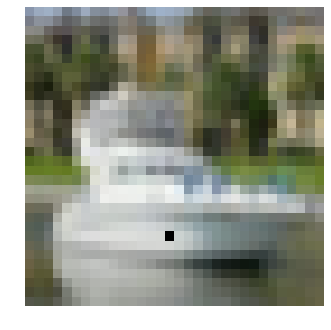

('airplane', '0.000120')
('automobile', '0.252020')
('bird', '0.000005')
('cat', '0.000244')
('deer', '0.000004')
('dog', '0.000000')
('frog', '0.000015')
('horse', '0.000018')
('ship', '0.747526')
('truck', '0.000048')
avg      	gen	max      	min      	nevals	std       
-0.999392	1  	-0.984877	-0.999986	64    	0.00197138
-0.994994	2  	-0.775871	-0.999979	64    	0.0279935 
-0.986525	3  	-0.477083	-0.999967	64    	0.0666237 
-0.970927	4  	0.673543 	-0.999979	64    	0.207367  


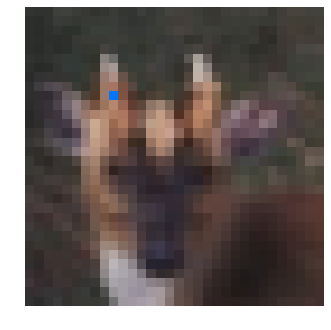

('airplane', '0.000001')
('automobile', '0.000002')
('bird', '0.000001')
('cat', '0.000000')
('deer', '0.162848')
('dog', '0.000628')
('frog', '0.000001')
('horse', '0.000059')
('ship', '0.836392')
('truck', '0.000068')
avg      	gen	max      	min	nevals	std        
-0.999983	1  	-0.999388	-1 	64    	7.51626e-05
-0.99999 	2  	-0.999863	-1 	64    	2.0024e-05 
-0.999986	3  	-0.999561	-0.999999	64    	5.40161e-05
-0.999981	4  	-0.999737	-1       	64    	4.01259e-05
-0.999952	5  	-0.999182	-1       	64    	0.000138674
-0.999913	6  	-0.99912 	-0.999999	64    	0.000205258
-0.99989 	7  	-0.997061	-0.999998	64    	0.000404999
-0.999905	8  	-0.998627	-0.999999	64    	0.000232045
-0.999852	9  	-0.998945	-1       	64    	0.000254202
-0.999818	10 	-0.998732	-0.999998	64    	0.000265807
-0.999802	11 	-0.997403	-1       	64    	0.000374483
-0.999674	12 	-0.998634	-0.999997	64    	0.000340868
-0.999619	13 	-0.996537	-0.999998	64    	0.000523735
-0.999357	14 	-0.996743	-0.999991	64    	0.000722434
-0.

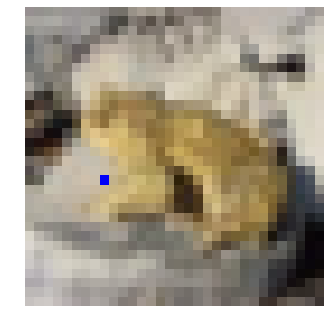

('airplane', '0.000007')
('automobile', '0.000007')
('bird', '0.000000')
('cat', '0.000016')
('deer', '0.001407')
('dog', '0.000001')
('frog', '0.997253')
('horse', '0.001081')
('ship', '0.000176')
('truck', '0.000051')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

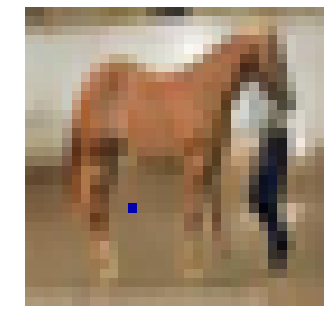

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '1.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999993	-1 	64    	1.12547e-06
-0.999999	2  	-0.999989	-1 	64    	1.93046e-06
-0.999996	3  	-0.999894	-1 	64    	1.33278e-05
-0.999993	4  	-0.999894	-1 	64    	1.90708e-05
-0.99999 	5  	-0.999875	-1 	64    	2.36568e-05
-0.999994	6  	-0.999935	-1 	64    	1.17113e-05
-0.999978	7  	-0.999505	-1 	64    	6.85141e-05
-0.999979	8  	-0.999714	-1 	64    	4.76326e-05
-0.999945	9  	-0.999276	-1 	64    	0.000120647
-0.999928	10 	-0.999213	-0.999999	64    	0.000153469
-0.999927	11 	-0.999597	-0.999998	64    	9.32264e-05
-0.999883	12 	-0.999515	-0.999997	64    	0.000114624
-0.999829	13 	-0.999213	-0.999996	64    	0.000184486
-0.999805	14 	-0.999269	-0.999992	64    	0.000173758
-0.999807	15 	-0.999485	-0.999996	64    	0.00

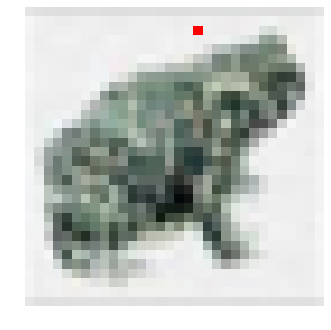

('airplane', '0.000001')
('automobile', '0.000003')
('bird', '0.000000')
('cat', '0.000031')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.999575')
('horse', '0.000002')
('ship', '0.000027')
('truck', '0.000362')
avg      	gen	max     	min      	nevals	std     
-0.555534	1  	0.969737	-0.999799	64    	0.651065


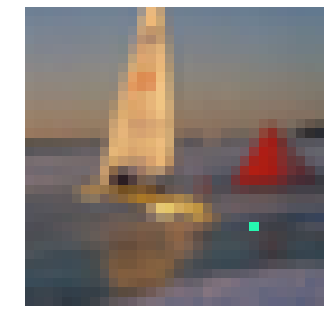

('airplane', '0.984869')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.015131')
('truck', '0.000000')
avg      	gen	max     	min      	nevals	std     
-0.657118	1  	0.748979	-0.999902	64    	0.391387


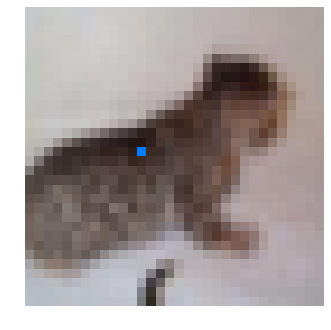

('airplane', '0.000001')
('automobile', '0.000005')
('bird', '0.000119')
('cat', '0.125027')
('deer', '0.000001')
('dog', '0.000835')
('frog', '0.874006')
('horse', '0.000007')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999991	-1 	64    	1.21058e-06
-0.999999	2  	-0.99999 	-1 	64    	1.51996e-06
-0.999999	3  	-0.999989	-1 	64    	2.53279e-06
-0.999999	4  	-0.999994	-1 	64    	7.8698e-07 
-0.999999	5  	-0.999993	-1 	64    	1.06149e-06
-0.999999	6  	-0.999986	-1 	64    	2.50881e-06
-0.999996	7  	-0.999807	-1 	64    	2.38738e-05
-0.999998	8  	-0.999943	-1 	64    	7.37846e-06
-0.999968	9  	-0.998176	-1 	64    	0.000226007
-0.999876	10 	-0.995067	-1 	64    	0.000629266
-0.997575	11 	-0.873806	-1 	64    	0.0157583  
-0.998738	12 	-0.973446	-1 	64    	0.00450152 
-0.997036	13 	-0.874347	-1 	64    	0.0156758  
-0.995065	14 	-0.874347	-1 	64    	0.0180025  
-0.996888	15 	-0.926502	-1 	64    	0.0125664  
-0.989613	16 	-0.874347	-1 	

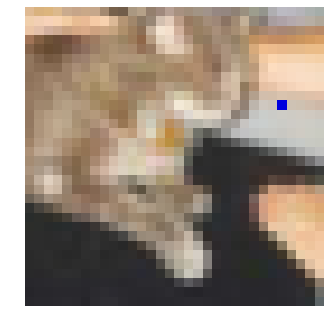

('airplane', '0.136142')
('automobile', '0.000000')
('bird', '0.000002')
('cat', '0.863830')
('deer', '0.000004')
('dog', '0.000018')
('frog', '0.000001')
('horse', '0.000001')
('ship', '0.000001')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.994826	1  	-0.694492	-0.999992	64    	0.0378879
-0.998216	2  	-0.919214	-1       	64    	0.0101345
-0.998774	3  	-0.965244	-1       	64    	0.00480688
-0.969314	4  	0.797657 	-0.999998	64    	0.223208  


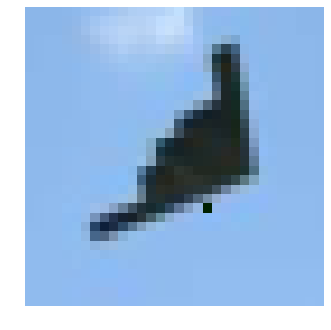

('airplane', '0.101172')
('automobile', '0.000000')
('bird', '0.898828')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max     	min      	nevals	std     
-0.325212	1  	0.999785	-0.944915	64    	0.552278


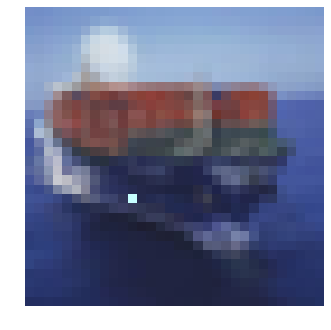

('airplane', '0.999888')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000103')
('truck', '0.000009')
avg      	gen	max      	min      	nevals	std        
-0.999933	1  	-0.999275	-0.999997	64    	0.000106529
-0.999922	2  	-0.999292	-0.999991	64    	0.000123508
-0.999938	3  	-0.999369	-0.999997	64    	8.7931e-05 
-0.999936	4  	-0.999724	-0.999998	64    	6.39107e-05
-0.999923	5  	-0.999461	-0.999994	64    	9.93792e-05
-0.999877	6  	-0.998248	-0.999996	64    	0.000257315
-0.999853	7  	-0.998546	-0.999996	64    	0.00025704 
-0.999888	8  	-0.99919 	-0.999995	64    	0.00015863 
-0.999835	9  	-0.998258	-0.999996	64    	0.000278333
-0.999803	10 	-0.99823 	-0.999995	64    	0.00028412 
-0.999883	11 	-0.999051	-0.999996	64    	0.000153519
-0.999828	12 	-0.998972	-0.999997	64    	0.000245996
-0.99978 	13 	-0.998408	-0.999998	64    	0.000332202
-0.999721	14 	-0.996391	-0.999997	64  

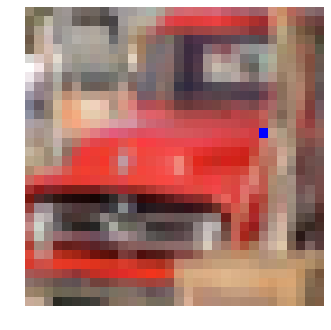

('airplane', '0.000000')
('automobile', '0.002257')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.997743')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999992	-1 	64    	1.03403e-06
-0.999998	2  	-0.99993 	-1 	64    	9.13238e-06
-0.99995 	3  	-0.998406	-1 	64    	0.000274052
-0.999357	4  	-0.960886	-1 	64    	0.0048521  
-0.999779	5  	-0.989745	-1 	64    	0.00131402 
-0.991156	6  	-0.639147	-1 	64    	0.050429   
-0.997758	7  	-0.931103	-1 	64    	0.00986378 
-0.985942	8  	-0.638678	-1 	64    	0.05885    
-0.978104	9  	-0.628646	-1 	64    	0.0611988  
-0.967867	10 	-0.616587	-1 	64    	0.0854931  
-0.946511	11 	0.0461574	-1 	64    	0.15494    


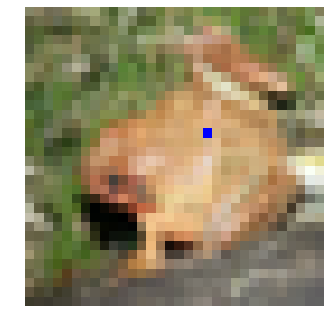

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000089')
('cat', '0.000000')
('deer', '0.523032')
('dog', '0.000001')
('frog', '0.476875')
('horse', '0.000003')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

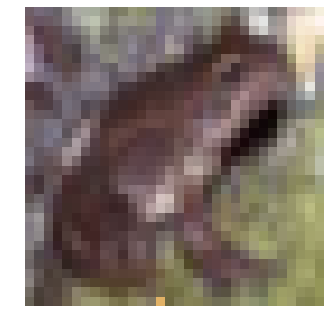

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '1.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.990556	1  	-0.872272	-0.999909	64    	0.0161898
-0.98413 	2  	-0.674679	-0.999879	64    	0.0417271
-0.979781	3  	-0.78645 	-0.999919	64    	0.0371507
-0.98192 	4  	-0.897577	-0.999983	64    	0.0211482
-0.971409	5  	-0.769817	-0.999907	64    	0.0510058
-0.972247	6  	-0.691327	-0.999858	64    	0.0456043
-0.968339	7  	-0.763434	-0.999915	64    	0.0499707
-0.932214	8  	-0.517112	-0.99934 	64    	0.0968852
-0.930034	9  	-0.621101	-0.999924	64    	0.0929968
-0.907146	10 	-0.534128	-0.99932 	64    	0.118199 
-0.905359	11 	-0.45079 	-0.999489	64    	0.114391 
-0.845687	12 	-0.233295	-0.996493	64    	0.1617   
-0.772935	13 	-0.290666	-0.989405	64    	0.172274 
-0.781296	14 	-0.427187	-0.987452	64    	0.148729 
-0.702142	15 	-

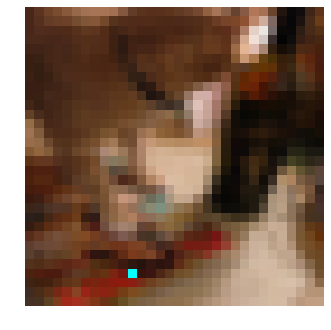

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.488286')
('deer', '0.000913')
('dog', '0.510747')
('frog', '0.000001')
('horse', '0.000030')
('ship', '0.000000')
('truck', '0.000024')
avg      	gen	max      	min     	nevals	std    
-0.797014	1  	-0.359225	-0.98222	64    	0.10674
-0.774145	2  	-0.536429	-0.945184	64    	0.0796646
-0.746288	3  	-0.080825	-0.948876	64    	0.157666 
-0.728828	4  	-0.374939	-0.902825	64    	0.115366 
-0.653245	5  	-0.0789687	-0.870499	64    	0.157699 
-0.712515	6  	0.0325813 	-0.865926	64    	0.172693 


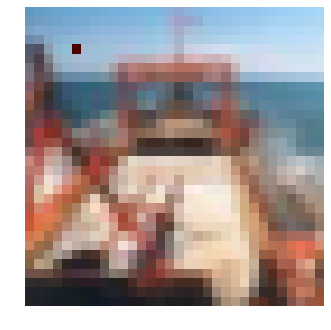

('airplane', '0.015774')
('automobile', '0.000028')
('bird', '0.000003')
('cat', '0.000015')
('deer', '0.000130')
('dog', '0.000002')
('frog', '0.000011')
('horse', '0.500002')
('ship', '0.467420')
('truck', '0.016615')
avg      	gen	max      	min      	nevals	std     
-0.919408	1  	-0.277571	-0.991765	64    	0.117815
-0.907578	2  	-0.341028	-0.999209	64    	0.134213
-0.884782	3  	-0.313728	-0.997309	64    	0.152151
-0.848368	4  	-0.120692	-0.995546	64    	0.17868 
-0.850989	5  	0.198155 	-0.993892	64    	0.183164


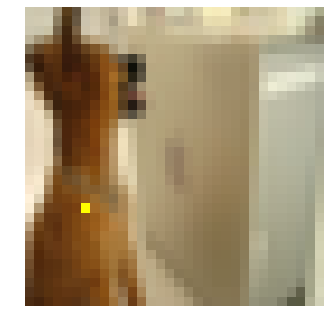

('airplane', '0.000003')
('automobile', '0.000040')
('bird', '0.095347')
('cat', '0.551224')
('deer', '0.000001')
('dog', '0.353069')
('frog', '0.000031')
('horse', '0.000100')
('ship', '0.000027')
('truck', '0.000157')
avg      	gen	max      	min      	nevals	std       
-0.991362	1  	-0.923599	-0.999179	64    	0.00959729
-0.987897	2  	-0.791606	-0.999963	64    	0.0303738 
-0.987361	3  	-0.824113	-0.999775	64    	0.0228126 
-0.956148	4  	0.454257 	-0.999678	64    	0.200983  


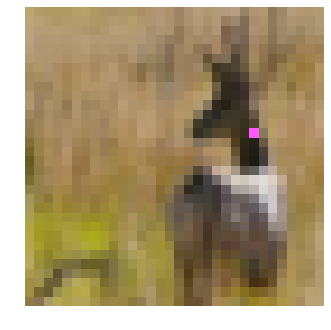

('airplane', '0.000000')
('automobile', '0.000033')
('bird', '0.711748')
('cat', '0.028882')
('deer', '0.257491')
('dog', '0.000056')
('frog', '0.000004')
('horse', '0.001770')
('ship', '0.000000')
('truck', '0.000015')
avg      	gen	max      	min      	nevals	std      
-0.967387	1  	-0.698457	-0.999911	64    	0.0447074
-0.966012	2  	-0.7802  	-0.999969	64    	0.0453499
-0.960035	3  	-0.767142	-0.999659	64    	0.0479903
-0.932369	4  	0.648818 	-0.999943	64    	0.205332 


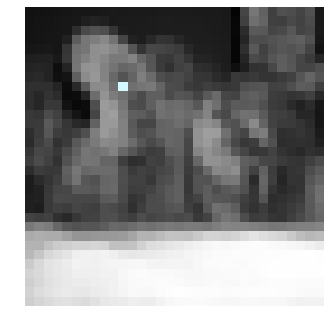

('airplane', '0.000000')
('automobile', '0.000059')
('bird', '0.000579')
('cat', '0.174650')
('deer', '0.001006')
('dog', '0.823468')
('frog', '0.000213')
('horse', '0.000020')
('ship', '0.000001')
('truck', '0.000003')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999999	-1 	64    	1.92997e-07
-0.999999	2  	-0.999997	-1 	64    	4.11648e-07
-0.999999	3  	-0.999999	-1 	64    	1.93283e-07
-0.999999	4  	-0.999998	-1 	64    	2.40707e-07
-0.999999	5  	-0.999977	-1 	64    	2.9031e-06 
-0.999999	6  	-0.999995	-1 	64    	8.24059e-07
-0.999999	7  	-0.999994	-1 	64    	9.7653e-07 
-0.999999	8  	-0.999977	-1 	64    	3.26826e-06
-0.999999	9  	-0.999977	-1 	64    	2.97536e-06
-0.999998	10 	-0.999974	-1 	64    	4.4712e-06 
-0.999999	11 	-0.999982	-1 	64    	2.58846e-06
-0.999999	12 	-0.999995	-1 	64    	8.87772e-07
-0.999999	13 	-0.999988	-1 	64    	2.12707e-06
-0.999998	14 	-0.999976	-1 	64    	4.08587e-06
-0.999997	15 	-0.999967	-1 	64    	6.12004e-06
-0.999996	16 	-0.999911	-1 	

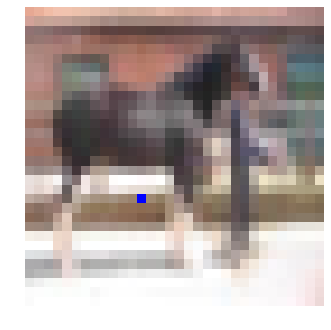

('airplane', '0.000000')
('automobile', '0.000011')
('bird', '0.000000')
('cat', '0.000046')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000001')
('horse', '0.999932')
('ship', '0.000009')
('truck', '0.000000')
avg	gen	max	min	nevals	std        
-1 	1  	-1 	-1 	64    	1.00682e-07
-1 	2  	-0.999999	-1 	64    	1.89505e-07
-1 	3  	-0.999998	-1 	64    	3.32292e-07
-1 	4  	-0.999987	-1 	64    	1.64349e-06
-1 	5  	-0.999999	-1 	64    	1.67886e-07
-1 	6  	-0.999998	-1 	64    	4.19015e-07
-1 	7  	-0.999998	-1 	64    	3.78278e-07
-1 	8  	-0.999998	-1 	64    	3.46787e-07
-0.999999	9  	-0.999989	-1 	64    	1.71536e-06
-1       	10 	-0.999998	-1 	64    	5.05213e-07
-1       	11 	-0.999995	-1 	64    	8.38144e-07
-0.999999	12 	-0.999988	-1 	64    	1.48152e-06
-0.999999	13 	-0.999997	-1 	64    	6.40826e-07
-0.999999	14 	-0.999997	-1 	64    	7.0751e-07 
-0.999999	15 	-0.999997	-1 	64    	8.31011e-07
-0.999999	16 	-0.999997	-1 	64    	9.30032e-07
-0.999999	17 	-0.999997	-1 	64    	7.96014e-07


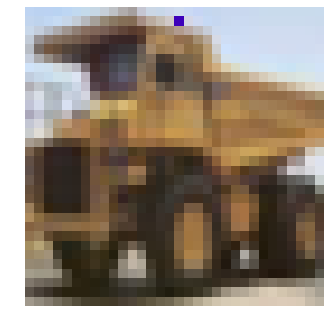

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000007')
('truck', '0.999993')
avg	gen	max      	min	nevals	std        
-1 	1  	-0.999997	-1 	64    	5.63375e-07
-0.999999	2  	-0.999995	-1 	64    	9.29491e-07
-1       	3  	-0.999998	-1 	64    	3.81615e-07
-0.999999	4  	-0.999996	-1 	64    	6.05895e-07
-0.999999	5  	-0.999994	-1 	64    	1.02914e-06
-0.999999	6  	-0.999995	-1 	64    	1.29185e-06
-0.999999	7  	-0.999994	-1 	64    	1.5133e-06 
-0.999999	8  	-0.999994	-1 	64    	1.33004e-06
-0.999999	9  	-0.999994	-1 	64    	1.49276e-06
-0.999998	10 	-0.999993	-1 	64    	1.98702e-06
-0.999998	11 	-0.999994	-1 	64    	1.77553e-06
-0.999997	12 	-0.99999 	-1 	64    	2.2921e-06 
-0.999996	13 	-0.999989	-1 	64    	2.25585e-06
-0.999996	14 	-0.999993	-1 	64    	2.06125e-06
-0.999995	15 	-0.999992	-1 	64    	1.90467e-06
-0.999994	16 	-0.999993	-0.999998	64    

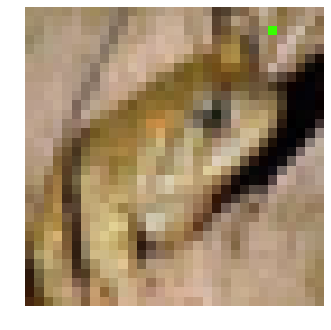

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000005')
('dog', '0.000000')
('frog', '0.999994')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std        
-0.999998	1  	-0.999992	-0.999999	64    	8.73435e-07
-0.999998	2  	-0.999995	-0.999999	64    	8.02797e-07
-0.999997	3  	-0.999987	-0.999999	64    	1.78471e-06
-0.999996	4  	-0.999976	-1       	64    	3.86936e-06
-0.999995	5  	-0.999952	-1       	64    	8.36813e-06
-0.999996	6  	-0.999968	-1       	64    	5.93755e-06
-0.999995	7  	-0.999899	-1       	64    	1.28591e-05
-0.999996	8  	-0.999978	-1       	64    	4.28378e-06
-0.999994	9  	-0.999954	-1       	64    	9.56884e-06
-0.999994	10 	-0.999953	-1       	64    	8.33538e-06
-0.999991	11 	-0.999947	-1       	64    	1.08032e-05
-0.999992	12 	-0.999957	-1       	64    	1.05701e-05
-0.999991	13 	-0.999957	-1       	64    	9.91957e-06
-0.999987	14 	-0.999944	-1       	64  

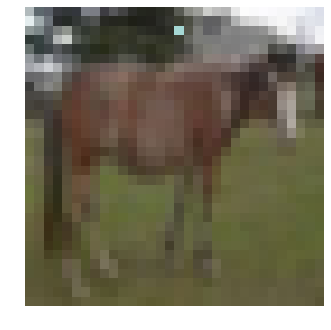

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000050')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.999949')
('ship', '0.000000')
('truck', '0.000000')
avg     	gen	max   	min      	nevals	std     
-0.69865	1  	0.5492	-0.966135	64    	0.235345


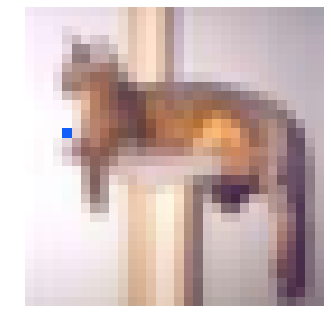

('airplane', '0.000228')
('automobile', '0.000094')
('bird', '0.000000')
('cat', '0.079991')
('deer', '0.000050')
('dog', '0.290406')
('frog', '0.000000')
('horse', '0.629191')
('ship', '0.000001')
('truck', '0.000038')
avg      	gen	max      	min	nevals	std        
-0.999994	1  	-0.999709	-1 	64    	3.59119e-05
-0.999909	2  	-0.997219	-1 	64    	0.000478839
-0.999938	3  	-0.997346	-1 	64    	0.000333731
-0.998662	4  	-0.922894	-1 	64    	0.00956915 
-0.999866	5  	-0.993294	-1 	64    	0.000830252
-0.999282	6  	-0.990233	-1 	64    	0.00201429 
-0.995931	7  	-0.845609	-1 	64    	0.0208095  
-0.975534	8  	-0.474891	-1 	64    	0.0779326  
-0.986079	9  	-0.804262	-0.999999	64    	0.0361748  
-0.96869 	10 	-0.48984 	-1       	64    	0.0821538  
-0.968125	11 	-0.439213	-1       	64    	0.0892444  
-0.947318	12 	-0.425462	-0.999997	64    	0.111939   
-0.89879 	13 	-0.460006	-0.999997	64    	0.142683   
-0.909025	14 	-0.48984 	-0.999985	64    	0.134141   
-0.88041 	15 	-0.447763	-0.999432	64   

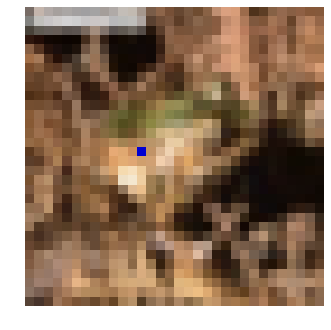

('airplane', '0.000000')
('automobile', '0.000001')
('bird', '0.000011')
('cat', '0.267742')
('deer', '0.039353')
('dog', '0.000186')
('frog', '0.692699')
('horse', '0.000003')
('ship', '0.000001')
('truck', '0.000005')
avg      	gen	max      	min      	nevals	std       
-0.997963	1  	-0.989984	-0.999976	64    	0.00152534
-0.997662	2  	-0.979627	-0.999942	64    	0.00280689
-0.987347	3  	-0.43414 	-0.999886	64    	0.0698339 
-0.984753	4  	-0.231983	-0.999935	64    	0.09495   
-0.993755	5  	-0.914992	-0.99993 	64    	0.0125121 
-0.982162	6  	-0.0880989	-0.999631	64    	0.112736  
-0.986122	7  	-0.476064 	-0.999857	64    	0.064617  
-0.992869	8  	-0.92027  	-0.999942	64    	0.0119272 
-0.99153 	9  	-0.93622  	-0.999921	64    	0.0110719 
-0.993587	10 	-0.96391  	-0.999927	64    	0.00707758
-0.992562	11 	-0.957799 	-0.999953	64    	0.00984949
-0.988092	12 	-0.881138 	-0.999616	64    	0.0163877 
-0.986571	13 	-0.956257 	-0.999902	64    	0.0121877 
-0.988672	14 	-0.957967 	-0.999912	64    	0.

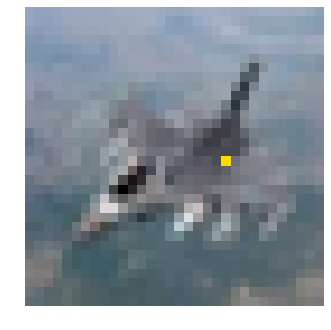

('airplane', '0.544044')
('automobile', '0.000000')
('bird', '0.455945')
('cat', '0.000003')
('deer', '0.000001')
('dog', '0.000000')
('frog', '0.000007')
('horse', '0.000000')
('ship', '0.000001')
('truck', '0.000000')
avg      	gen	max     	min	nevals	std        
-0.999999	1  	-0.99999	-1 	64    	1.70219e-06
-0.999998	2  	-0.999993	-1 	64    	1.45376e-06
-0.999998	3  	-0.999981	-1 	64    	2.91471e-06
-0.999983	4  	-0.999446	-1 	64    	7.21242e-05
-0.999983	5  	-0.999677	-1 	64    	4.65359e-05
-0.999944	6  	-0.998432	-1 	64    	0.000207008
-0.999941	7  	-0.998806	-1 	64    	0.000180067
-0.999839	8  	-0.997308	-1 	64    	0.000494792
-0.999791	9  	-0.992488	-1 	64    	0.000953312
-0.999503	10 	-0.992488	-1 	64    	0.00153091 
-0.999809	11 	-0.996189	-1 	64    	0.00057577 
-0.999691	12 	-0.997072	-0.999999	64    	0.000568408
-0.999518	13 	-0.994771	-0.999999	64    	0.000939306
-0.999492	14 	-0.992622	-0.999997	64    	0.00101187 
-0.998796	15 	-0.992488	-0.999998	64    	0.00196354 
-0.999

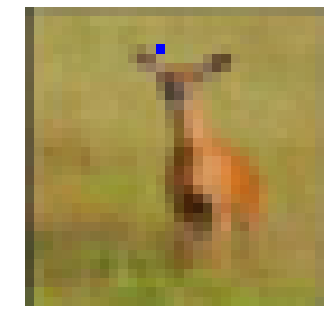

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.003669')
('cat', '0.000005')
('deer', '0.996157')
('dog', '0.000092')
('frog', '0.000000')
('horse', '0.000076')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999979	1  	-0.999863	-1 	64    	2.79556e-05
-0.999976	2  	-0.99988 	-0.999999	64    	2.82689e-05
-0.999964	3  	-0.999842	-0.999998	64    	3.56522e-05
-0.999956	4  	-0.99986 	-1       	64    	3.8135e-05 
-0.999935	5  	-0.999847	-0.999992	64    	3.34109e-05
-0.999936	6  	-0.999857	-0.999998	64    	3.87507e-05
-0.999932	7  	-0.999852	-0.999998	64    	3.73692e-05
-0.99992 	8  	-0.999854	-0.999995	64    	3.06978e-05
-0.999921	9  	-0.99984 	-0.999998	64    	3.87839e-05
-0.9999  	10 	-0.999837	-0.999965	64    	3.15519e-05
-0.999885	11 	-0.99983 	-0.999998	64    	3.54412e-05
-0.999879	12 	-0.999832	-0.999945	64    	3.23102e-05
-0.999872	13 	-0.99983 	-0.999999	64    	3.32513e-05
-0.999858	14 	-0.999829	-0.999931	64    	2.63202e-

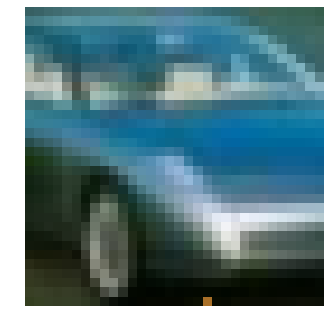

('airplane', '0.000089')
('automobile', '0.999910')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000001')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.998918	1  	-0.994345	-0.999881	64    	0.0009154
-0.998442	2  	-0.98701 	-0.999728	64    	0.00225719
-0.998588	3  	-0.993294	-0.999678	64    	0.00139795
-0.998263	4  	-0.989128	-0.999828	64    	0.00213236
-0.998497	5  	-0.983054	-0.999741	64    	0.00213293
-0.998186	6  	-0.990445	-0.999699	64    	0.00178774
-0.99771 	7  	-0.989937	-0.999718	64    	0.00225211
-0.997192	8  	-0.975258	-0.999718	64    	0.00353771
-0.996974	9  	-0.957833	-0.999696	64    	0.00552553
-0.996527	10 	-0.984786	-0.999751	64    	0.00353894
-0.995672	11 	-0.976976	-0.999627	64    	0.00491435
-0.994356	12 	-0.970445	-0.999615	64    	0.00584853
-0.9945  	13 	-0.972429	-0.999067	64    	0.00553435
-0.991797	14 	-0.96368 	-0.999097	64    	0.00715569
-0

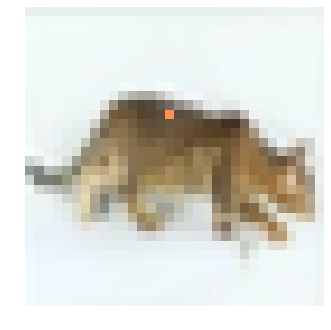

('airplane', '0.000110')
('automobile', '0.000019')
('bird', '0.000001')
('cat', '0.974067')
('deer', '0.000096')
('dog', '0.018810')
('frog', '0.006894')
('horse', '0.000002')
('ship', '0.000000')
('truck', '0.000001')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	7.39214e-09
-1 	8  	-1 	-1 	64    	7.39214e-09
-1 	9  	-1 	-1 	64    	0          
-1 	10 	-1 	-1 	64    	0          
-1 	11 	-1 	-1 	64    	0          
-1 	12 	-1 	-1 	64    	0          
-1 	13 	-1 	-1 	64    	0          
-1 	14 	-1 	-1 	64    	0          
-1 	15 	-1 	-1 	64    	0          
-1 	16 	-1 	-1 	64    	0          
-1 	17 	-1 	-1 	64    	0          
-1 	18 	-1 	-1 	64    	0          
-1 	19 	-1 	-1 	64    	0          
-1 	20 	-1 	-1 	64    	0          
-1 	21 	-1 	-1 	64    	0          
-1 	22 	-1 	-1 	64    	0          
-1 	23 	-1 	-1 	64    	0       

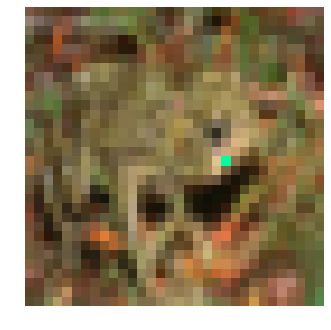

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '1.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	7.39214e-09
-1 	3  	-1 	-1 	64    	0          
-1 	4  	-1 	-1 	64    	2.95686e-08
-1 	5  	-1 	-1 	64    	0          
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	0          
-1 	8  	-1 	-1 	64    	0          
-1 	9  	-0.999998	-1 	64    	2.58713e-07
-1 	10 	-1       	-1 	64    	0          
-1 	11 	-0.999999	-1 	64    	8.88962e-08
-1 	12 	-0.999996	-1 	64    	5.53541e-07
-1 	13 	-1       	-1 	64    	6.2828e-08 
-1 	14 	-0.999999	-1 	64    	1.14757e-07
-0.999999	15 	-0.999964	-1 	64    	5.32822e-06
-0.999983	16 	-0.99893 	-1 	64    	0.000132726
-0.970613	17 	0.879135 	-1 	64    	0.233046   


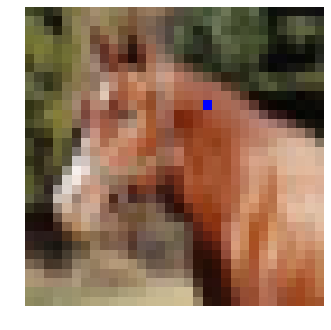

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000022')
('deer', '0.939556')
('dog', '0.000001')
('frog', '0.000000')
('horse', '0.060421')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std     
-0.974955	1  	-0.802142	-0.998396	64    	0.034565
-0.966405	2  	-0.549794	-0.998005	64    	0.0579294
-0.949662	3  	-0.271194	-0.998496	64    	0.101379 
-0.899356	4  	0.701347 	-0.998975	64    	0.28826  


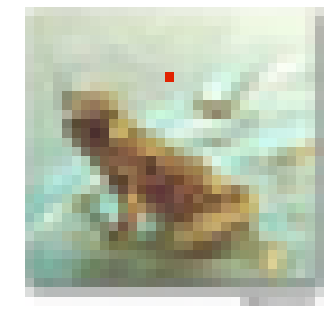

('airplane', '0.000002')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.850662')
('deer', '0.000001')
('dog', '0.000000')
('frog', '0.149315')
('horse', '0.000000')
('ship', '0.000018')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std      
-0.990183	1  	-0.843988	-0.998948	64    	0.0199263
-0.977678	2  	-0.22177 	-0.999684	64    	0.0964596
-0.968243	3  	-0.214689	-0.99936 	64    	0.104148 
-0.943341	4  	0.233361 	-0.999858	64    	0.17532  


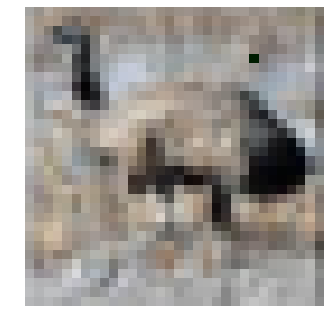

('airplane', '0.000001')
('automobile', '0.000000')
('bird', '0.383041')
('cat', '0.000002')
('deer', '0.000552')
('dog', '0.000002')
('frog', '0.616402')
('horse', '0.000001')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999964	-1 	64    	4.55352e-06
-1       	2  	-0.999995	-1 	64    	8.15961e-07
-0.999999	3  	-0.99996 	-1 	64    	4.92355e-06
-0.999999	4  	-0.99998 	-1 	64    	2.66209e-06
-0.999995	5  	-0.999703	-1 	64    	3.67574e-05
-0.999995	6  	-0.999774	-1 	64    	2.93679e-05
-0.999998	7  	-0.999961	-1 	64    	6.32925e-06
-0.999987	8  	-0.999793	-1 	64    	3.98991e-05
-0.999986	9  	-0.99963 	-1 	64    	5.10591e-05
-0.999962	10 	-0.998946	-1 	64    	0.000142819
-0.999948	11 	-0.998997	-1 	64    	0.000140105
-0.99985 	12 	-0.997497	-1 	64    	0.000352612
-0.999887	13 	-0.999013	-1 	64    	0.000234532
-0.999827	14 	-0.997497	-1 	64    	0.00044617 
-0.999831	15 	-0.998089	-0.999999	64    	0.000334772
-0.99971 	16 	-0.99749

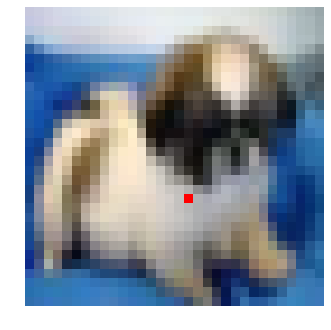

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.001251')
('deer', '0.000000')
('dog', '0.998749')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min      	nevals	std        
-0.999996	1  	-0.999991	-0.999999	64    	1.63451e-06
-0.999996	2  	-0.999993	-0.999999	64    	1.2301e-06 
-0.999996	3  	-0.99999 	-0.999998	64    	1.46668e-06
-0.999995	4  	-0.999991	-0.999998	64    	1.15439e-06
-0.999995	5  	-0.999991	-0.999998	64    	1.593e-06  
-0.999995	6  	-0.999989	-0.999998	64    	1.63319e-06
-0.999995	7  	-0.999986	-0.999998	64    	2.10229e-06
-0.999995	8  	-0.999988	-0.999999	64    	2.01351e-06
-0.999994	9  	-0.999983	-0.999999	64    	3.01956e-06
-0.999993	10 	-0.999981	-0.999998	64    	2.9917e-06 
-0.999993	11 	-0.999983	-0.999997	64    	2.90048e-06
-0.999991	12 	-0.99998 	-0.999998	64    	4.26214e-06
-0.999991	13 	-0.999981	-0.999997	64    	3.94236e-06
-0.99999 	14 	-0.999981	-0.999996	64  

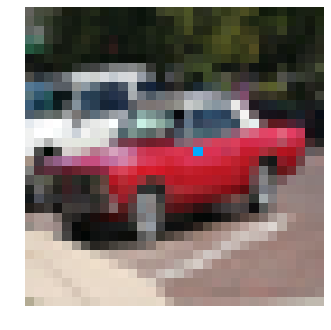

('airplane', '0.000000')
('automobile', '0.999983')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000016')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	0  
-1 	3  	-1 	-1 	64    	0  
-1 	4  	-1 	-1 	64    	0  
-1 	5  	-1 	-1 	64    	0  
-1 	6  	-1 	-1 	64    	0  
-1 	7  	-1 	-1 	64    	0  
-1 	8  	-1 	-1 	64    	0  
-1 	9  	-1 	-1 	64    	0  
-1 	10 	-1 	-1 	64    	0  
-1 	11 	-1 	-1 	64    	0  
-1 	12 	-1 	-1 	64    	0  
-1 	13 	-1 	-1 	64    	0  
-1 	14 	-1 	-1 	64    	0  
-1 	15 	-1 	-1 	64    	0  
-1 	16 	-1 	-1 	64    	0  
-1 	17 	-1 	-1 	64    	0  
-1 	18 	-1 	-1 	64    	0  
-1 	19 	-1 	-1 	64    	0  
-1 	20 	-1 	-1 	64    	0  
-1 	21 	-1 	-1 	64    	0  
-1 	22 	-1 	-1 	64    	0  
-1 	23 	-1 	-1 	64    	0  
-1 	24 	-1 	-1 	64    	0  
-1 	25 	-1 	-1 	64    	0  
-1 	26 	-1 	-1 	64    	0  
-1 	27 	-1 	-1 	64    	0  
-1 	28 	-1 	-1 	64    	0

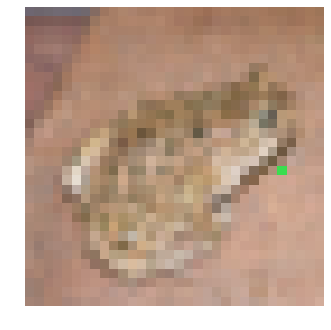

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '1.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std        
-0.999999	1  	-0.999997	-1 	64    	4.10999e-07
-0.999999	2  	-0.999997	-1 	64    	6.59679e-07
-0.999995	3  	-0.999819	-1 	64    	2.26248e-05
-0.99999 	4  	-0.999843	-1 	64    	2.7094e-05 
-0.999958	5  	-0.998961	-1 	64    	0.000149733
-0.99998 	6  	-0.999379	-1 	64    	9.21576e-05
-0.999977	7  	-0.999658	-1 	64    	6.69194e-05
-0.999923	8  	-0.998049	-1 	64    	0.000291453
-0.999889	9  	-0.995896	-1 	64    	0.000524893
-0.999765	10 	-0.994781	-0.999999	64    	0.000681401
-0.999581	11 	-0.995894	-0.999999	64    	0.000804617
-0.999559	12 	-0.994781	-0.999999	64    	0.000884911
-0.999006	13 	-0.994781	-0.999997	64    	0.00129198 
-0.998964	14 	-0.994781	-0.999995	64    	0.00125155 
-0.999173	15 	-0.995554	-0.999965	64    	0.00

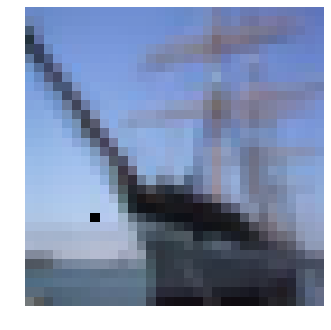

('airplane', '0.002610')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.997390')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	7.39214e-09
-1 	3  	-1 	-1 	64    	0          
-1 	4  	-1 	-1 	64    	0          
-1 	5  	-1 	-1 	64    	0          
-1 	6  	-1 	-1 	64    	0          
-1 	7  	-1 	-1 	64    	0          
-1 	8  	-1 	-1 	64    	0          
-1 	9  	-1 	-1 	64    	0          
-1 	10 	-1 	-1 	64    	0          
-1 	11 	-1 	-1 	64    	0          
-1 	12 	-1 	-1 	64    	2.21764e-08
-1 	13 	-1 	-1 	64    	0          
-1 	14 	-1 	-1 	64    	0          
-1 	15 	-1 	-1 	64    	0          
-1 	16 	-1 	-1 	64    	0          
-1 	17 	-1 	-1 	64    	0          
-1 	18 	-1 	-1 	64    	0          
-1 	19 	-1 	-1 	64    	0          
-1 	20 	-1 	-1 	64    	0          
-1 	21 	-1 	-1 	64    	0          
-1 	22 	-1 	-1 	64    	0  

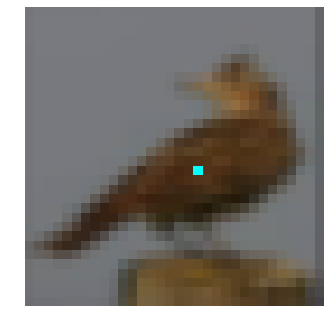

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '1.000000')
('cat', '0.000000')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max      	min	nevals	std      
-0.999997	1  	-0.999964	-1 	64    	7.789e-06
-0.999997	2  	-0.999948	-1 	64    	7.49138e-06
-0.999986	3  	-0.999626	-1 	64    	5.0993e-05 
-0.999996	4  	-0.99994 	-1 	64    	1.01502e-05
-0.999985	5  	-0.999785	-1 	64    	3.71832e-05
-0.999987	6  	-0.999898	-1 	64    	2.25466e-05
-0.999975	7  	-0.999791	-1 	64    	4.39404e-05
-0.999975	8  	-0.999653	-1 	64    	5.30084e-05
-0.999967	9  	-0.999683	-1 	64    	5.71152e-05
-0.999966	10 	-0.999653	-1 	64    	5.55832e-05
-0.999968	11 	-0.999808	-1 	64    	4.8576e-05 
-0.999943	12 	-0.999635	-1 	64    	5.98944e-05
-0.999926	13 	-0.999559	-1 	64    	9.10797e-05
-0.999901	14 	-0.999606	-1 	64    	9.91432e-05
-0.999881	15 	-0.999434	-0.999999	64    	0.000110311
-0.999851	16 	-0.998881	-0

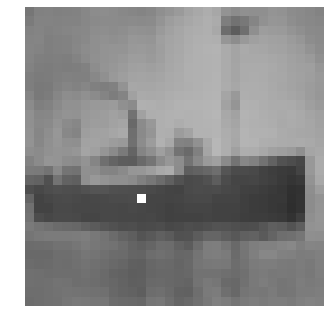

('airplane', '0.000396')
('automobile', '0.000319')
('bird', '0.000005')
('cat', '0.000000')
('deer', '0.000002')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.999277')
('truck', '0.000001')
avg      	gen	max     	min      	nevals	std    
-0.870726	1  	0.237196	-0.999776	64    	0.18727


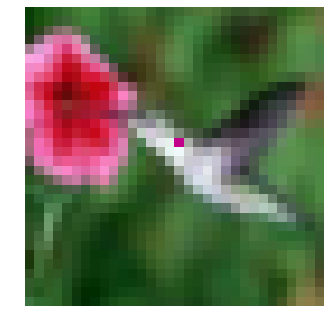

('airplane', '0.381334')
('automobile', '0.000007')
('bird', '0.618530')
('cat', '0.000000')
('deer', '0.000001')
('dog', '0.000000')
('frog', '0.000127')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000001')
avg      	gen	max      	min      	nevals	std        
-0.999986	1  	-0.999938	-0.999996	64    	1.02179e-05
-0.999988	2  	-0.999947	-0.999998	64    	9.8435e-06 
-0.999984	3  	-0.99992 	-0.999997	64    	1.62854e-05
-0.99998 	4  	-0.99989 	-0.999995	64    	1.87381e-05
-0.999973	5  	-0.999908	-0.999993	64    	2.10551e-05
-0.999974	6  	-0.999916	-0.999993	64    	1.68053e-05
-0.999971	7  	-0.999916	-0.999995	64    	2.02875e-05
-0.999963	8  	-0.999874	-0.999994	64    	2.17192e-05
-0.99995 	9  	-0.999806	-0.999993	64    	3.33926e-05
-0.999949	10 	-0.999911	-0.999994	64    	2.04363e-05
-0.999949	11 	-0.999861	-0.999987	64    	2.00522e-05
-0.999941	12 	-0.999845	-0.999994	64    	2.78737e-05
-0.999943	13 	-0.99988 	-0.999966	64    	1.74441e-05
-0.999944	14 	-0.999861	-0.999986	64  

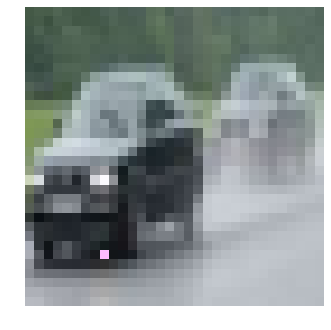

('airplane', '0.000005')
('automobile', '0.999892')
('bird', '0.000000')
('cat', '0.000001')
('deer', '0.000000')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000006')
('truck', '0.000097')
avg      	gen	max      	min      	nevals	std        
-0.999926	1  	-0.999393	-0.999991	64    	9.17113e-05
-0.999923	2  	-0.999482	-0.999994	64    	9.33416e-05
-0.999922	3  	-0.999643	-0.999991	64    	7.11444e-05
-0.999919	4  	-0.999528	-0.999999	64    	9.30896e-05
-0.999919	5  	-0.999628	-0.999988	64    	7.69235e-05
-0.999625	6  	-0.985021	-0.999996	64    	0.00186514 
-0.999786	7  	-0.998105	-0.999986	64    	0.0004099  
-0.999821	8  	-0.998273	-0.999984	64    	0.000231246
-0.999657	9  	-0.990665	-0.99999 	64    	0.0011778  
-0.999607	10 	-0.997741	-0.999983	64    	0.000576389
-0.9996  	11 	-0.997683	-0.999978	64    	0.000565068
-0.999456	12 	-0.997418	-0.999971	64    	0.00078255 
-0.999355	13 	-0.997424	-0.999959	64    	0.000744528
-0.998915	14 	-0.997097	-0.999982	64  

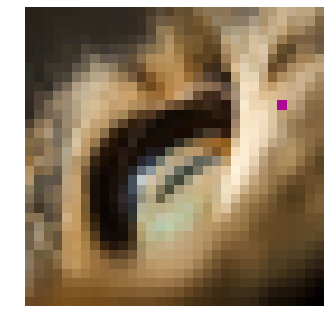

('airplane', '0.000000')
('automobile', '0.001873')
('bird', '0.000000')
('cat', '0.991573')
('deer', '0.006552')
('dog', '0.000000')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg	gen	max	min	nevals	std
-1 	1  	-1 	-1 	64    	0  
-1 	2  	-1 	-1 	64    	3.75775e-08
-1 	3  	-1 	-1 	64    	7.39214e-09
-0.999995	4  	-0.999662	-1 	64    	4.19549e-05
-1       	5  	-1       	-1 	64    	1.03708e-08
-1       	6  	-0.999999	-1 	64    	1.14757e-07
-1       	7  	-0.999999	-1 	64    	1.76785e-07
-1       	8  	-0.999987	-1 	64    	1.80033e-06
-1       	9  	-0.999999	-1 	64    	1.12978e-07
-1       	10 	-0.999996	-1 	64    	5.6644e-07 
-0.999999	11 	-0.999972	-1 	64    	4.05182e-06
-0.999973	12 	-0.998906	-1 	64    	0.00015437 
-0.999999	13 	-0.999973	-1 	64    	4.53018e-06
-0.999999	14 	-0.999973	-1 	64    	4.73493e-06
-0.999982	15 	-0.999122	-1 	64    	0.000109448
-0.999974	16 	-0.998485	-1 	64    	0.000187759
-0.999925	17 	-0.997755	-1 	64    	0.00033975

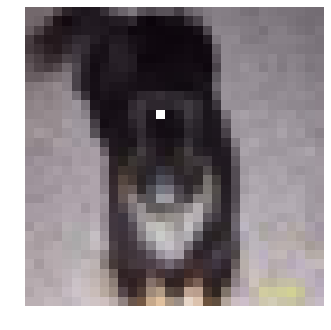

('airplane', '0.000000')
('automobile', '0.000000')
('bird', '0.000000')
('cat', '0.009591')
('deer', '0.000000')
('dog', '0.990409')
('frog', '0.000000')
('horse', '0.000000')
('ship', '0.000000')
('truck', '0.000000')
avg      	gen	max     	min      	nevals	std        
-0.999957	1  	-0.99955	-0.999984	64    	6.36912e-05
-0.999949	2  	-0.999149	-0.999997	64    	0.000109245
-0.999848	3  	-0.994452	-0.999996	64    	0.000690823
-0.999937	4  	-0.99926 	-0.999992	64    	0.000119561
-0.999308	5  	-0.971253	-0.999995	64    	0.00361733 
-0.999384	6  	-0.967886	-0.999991	64    	0.00397269 
-0.999561	7  	-0.986324	-0.999997	64    	0.00181517 
-0.998531	8  	-0.937917	-0.999997	64    	0.00778859 
-0.998915	9  	-0.973426	-0.999998	64    	0.00395191 
-0.996234	10 	-0.818235	-0.999996	64    	0.0229312  
-0.997961	11 	-0.94559 	-0.999993	64    	0.00754389 
-0.993412	12 	-0.818154	-0.999997	64    	0.0305785  
-0.989839	13 	-0.57802 	-0.999993	64    	0.0526006  
-0.982617	14 	-0.688618	-0.999993	64    

In [0]:
# res = []
# for i in range(100):
#     attacker = CIFAR10_attacker(resnet_model, X_test[i], num_pixels=1)
#     res.append(attacker.cma_es_attack(num_gen=200, sigma=0.2))
#     #res.append(attacker.eaMuCommaLambda_attack(num_gen=200)) 
#     #attacker.DE_attack(num_gen=100)
#     resnet_model.predict_and_show(attacker.add_adv(attacker.hof[0]))